Welcome to my final project.  We'll be looking at the Board Game Geek database in order to look at what makes a successful board game.  With several sections of data, ranging from number of players, to average hours for a play, to mechanics and genre.  While I'm coming into this with a good idea of what seems to be a good game (I'm expecting 2-3 hours, 2-3 points of complexity, and an average of around 4 players (party games and 2 player games I expect to have their own constituencies and to roughly even out)  It's also worth noting that BGG is likely to have it's own biases.  But for a student project, it should make for an amazing source of data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
#import sklearn
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
pd.set_option('display.width', 1000)

In [3]:
game_df = pd.read_csv(r'C:\Users\Tylor\Documents\GitHub\Learning Projects\Final Project\BGG_Data_Set.csv')
print(game_df.head(20))
print(game_df.describe(include='all'))
print(game_df.info())

          ID                                           Name  Year Published  Min Players  Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  Complexity Average  Owned Users                                          Mechanics                         Domains
0   174430.0                                     Gloomhaven          2017.0            1            4        120       14        42055            8.79         1                3.86      68323.0  Action Queue, Action Retrieval, Campaign / Bat...  Strategy Games, Thematic Games
1   161936.0                      Pandemic Legacy: Season 1          2015.0            2            4         60       13        41643            8.61         2                2.84      65294.0  Action Points, Cooperative Game, Hand Manageme...  Strategy Games, Thematic Games
2   224517.0                              Brass: Birmingham          2018.0            2            4        120       14        19217            8.66         3         

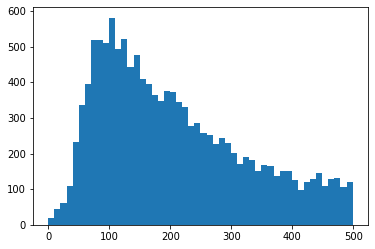

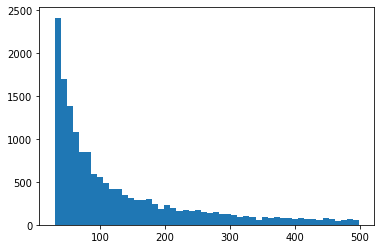

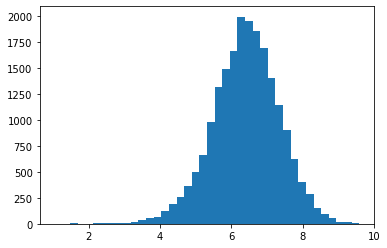

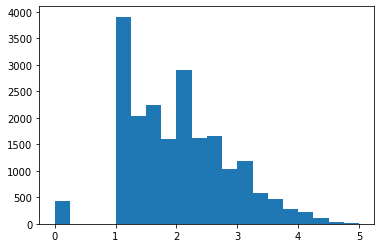

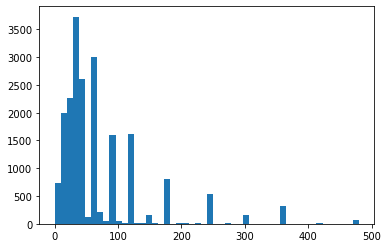

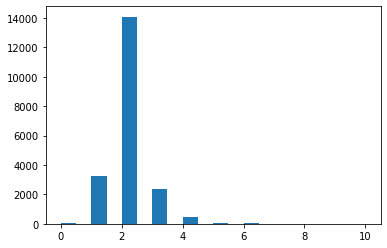

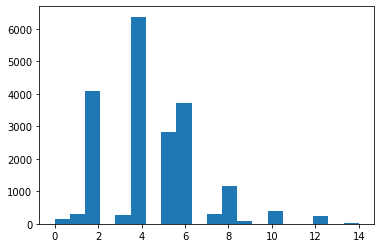

In [4]:
plt.hist(game_df[game_df['Owned Users']<500]['Owned Users'], bins=50)
plt.show()

plt.hist(game_df[game_df['Users Rated']<500]['Users Rated'], bins=50)
plt.savefig('test.png')
plt.show()

plt.hist(game_df['Rating Average'], bins=40)
plt.show()

plt.hist(game_df['Complexity Average'], bins=20)
plt.show()

plt.hist(game_df[game_df['Play Time'] < 500]['Play Time'], bins = 50)
plt.show()

plt.hist(game_df['Min Players'], bins = 20)
plt.show()

plt.hist(game_df[game_df['Max Players'] < 15]['Max Players'], bins = 20)
plt.show()

#print(game_df[game_df['Owned Users'].isnull() == True])

Alright, we've got our dataframe setup and we've poked around with it all a little bit.  Now let's wrangle this into useable form.  First up, we'll drop the nulls from Owners and ID.  Since every missing ID also has null ownership, this will be easy to do.  There are two other categories that are missing, but Domains and Game Mechanics will be dealt with in the rest of this process.

Specifically, we'll break those columns up with each possible entry getting their own column with 1/0 results.

Looking into it further, found a method that does everything I want in a single line of code.  Yay?
The result is a little too big and unwieldy.  Might need to prune it down a bit.

In [5]:
#Dropping nulls from Owned Users, ID and Year Published.
games = game_df
games = games.dropna(subset=['Owned Users'])

#Now let's split up the domain and mechanic categories and make our mega db.
games = pd.concat([games, games['Domains'].str.get_dummies(sep=', ')], 1)
games = pd.concat([games, games['Mechanics'].str.get_dummies(sep=', ')], 1)
games=games.drop(columns=['Domains', 'Mechanics'])

In [6]:
#Grabbing a list I can use for subsetting the megadf
domains_df = game_df[['ID', 'Domains']]
domains_df = pd.concat([domains_df, domains_df['Domains'].str.get_dummies(sep=', ')], 1)
domains_df = domains_df.drop(columns=['ID', 'Domains'])
domains = domains_df.columns.values.tolist()
mechanics_df = game_df[['ID', 'Mechanics']]
mechanics_df = pd.concat([mechanics_df, mechanics_df['Mechanics'].str.get_dummies(sep=', ')], 1)
mechanics_df = mechanics_df.drop(columns=['ID', 'Mechanics'])
mechanics = mechanics_df.columns.values.tolist()

In [7]:
games_columns = games.columns.values.tolist()
print(games_columns)
print(len(games_columns))
print(domains)
print(len(domains))
print(mechanics)
print(len(mechanics))

['ID', 'Name', 'Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank', 'Complexity Average', 'Owned Users', 'Abstract Games', "Children's Games", 'Customizable Games', 'Family Games', 'Party Games', 'Strategy Games', 'Thematic Games', 'Wargames', 'Acting', 'Action Drafting', 'Action Points', 'Action Queue', 'Action Retrieval', 'Action Timer', 'Action/Event', 'Advantage Token', 'Alliances', 'Area Majority / Influence', 'Area Movement', 'Area-Impulse', 'Auction/Bidding', 'Auction: Dexterity', 'Auction: Dutch', 'Auction: Dutch Priority', 'Auction: English', 'Auction: Fixed Placement', 'Auction: Once Around', 'Auction: Sealed Bid', 'Auction: Turn Order Until Pass', 'Automatic Resource Growth', 'Betting and Bluffing', 'Bias', 'Bingo', 'Bribery', 'Campaign / Battle Card Driven', 'Card Drafting', 'Card Play Conflict Resolution', 'Catch the Leader', 'Chaining', 'Chit-Pull System', 'Closed Economy Auction', 'Command Cards', 'Commodity

In [8]:
#This area for adding up domains and mechanics per entry
games['Domains'] = games[list(domains)].sum(axis=1)
games['Mechanics'] = games[list(mechanics)].sum(axis=1)

#Columns made, let's get an overview.
print(games['Domains'].value_counts())
print(games['Domains'].value_counts(normalize=True))
print(games['Mechanics'].value_counts())
print(games['Mechanics'].value_counts(normalize=True))

0    10136
1     8692
2     1479
3       13
Name: Domains, dtype: int64
0    0.498819
1    0.427756
2    0.072785
3    0.000640
Name: Domains, dtype: float64
2     4713
1     4445
3     3732
4     2406
0     1581
5     1458
6      793
7      485
8      300
9      177
10     107
11      49
12      33
13      15
14       8
16       6
17       5
18       3
15       3
19       1
Name: Mechanics, dtype: int64
2     0.231939
1     0.218750
3     0.183661
4     0.118406
0     0.077805
5     0.071752
6     0.039026
7     0.023868
8     0.014764
9     0.008711
10    0.005266
11    0.002411
12    0.001624
13    0.000738
14    0.000394
16    0.000295
17    0.000246
18    0.000148
15    0.000148
19    0.000049
Name: Mechanics, dtype: float64


In [9]:
#Looking at breakdown of how many domains are shared.
total = []
single_d = []
double_d = []
triple_d = []
for domain in domains:
    total.append(len(games[games[domain]==1]))
    single_d.append(len(games[(games[domain]==1) & (games['Domains']==1)]))
    double_d.append(len(games[(games[domain]==1) & (games['Domains']==2)]))
    triple_d.append(len(games[(games[domain]==1) & (games['Domains']==3)]))
shared_d_tuples = list(zip(domains, total, single_d, double_d, triple_d))
shared_d = pd.DataFrame(shared_d_tuples, columns=('Domain', 'Total', 'Single', 'Double', 'Triple'))
print(shared_d)
print(str(shared_d['Domain']) + ': ' + str((shared_d['Single']/shared_d['Total'])*100))
print((shared_d['Double']/shared_d['Total'])*100)



               Domain  Total  Single  Double  Triple
0      Abstract Games   1070     869     199       2
1    Children's Games    849     708     138       3
2  Customizable Games    297     235      61       1
3        Family Games   2173    1340     828       5
4         Party Games    605     409     193       3
5      Strategy Games   2205    1455     743       7
6      Thematic Games   1174     647     517      10
7            Wargames   3316    3029     279       8
0        Abstract Games
1      Children's Games
2    Customizable Games
3          Family Games
4           Party Games
5        Strategy Games
6        Thematic Games
7              Wargames
Name: Domain, dtype: object: 0    81.214953
1    83.392226
2    79.124579
3    61.665900
4    67.603306
5    65.986395
6    55.110733
7    91.344994
dtype: float64
0    18.598131
1    16.254417
2    20.538721
3    38.104004
4    31.900826
5    33.696145
6    44.037479
7     8.413752
dtype: float64


<AxesSubplot:>

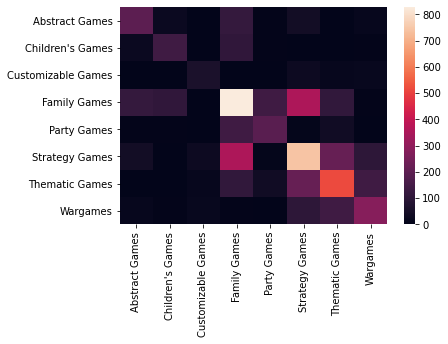

In [10]:
abstract = []
children = []
custom = []
family = []
party = []
strat = []
theme = []
war = []

for domain in domains:
    abstract.append(len(games[(games[domain]==1) & (games['Abstract Games']==1) & (games['Domains']==2)]))
    children.append(len(games[(games[domain]==1) & (games['Children\'s Games']==1) & (games['Domains']==2)]))
    custom.append(len(games[(games[domain]==1) & (games['Customizable Games']==1) & (games['Domains']==2)]))
    family.append(len(games[(games[domain]==1) & (games['Family Games']==1) & (games['Domains']==2)]))
    party.append(len(games[(games[domain]==1) & (games['Party Games']==1) & (games['Domains']==2)]))
    strat.append(len(games[(games[domain]==1) & (games['Strategy Games']==1) & (games['Domains']==2)]))
    theme.append(len(games[(games[domain]==1) & (games['Thematic Games']==1) & (games['Domains']==2)]))
    war.append(len(games[(games[domain]==1) & (games['Wargames']==1) & (games['Domains']==2)]))
heat_d_tuples = list(zip(abstract, children, custom, family, party, strat, theme, war))
heat_d = pd.DataFrame(heat_d_tuples, index=(domains), columns=(domains))                                                  
        
sns.heatmap(heat_d)

In [11]:
print('Total')
print(games.agg({ 'Complexity Average':[np.mean, np.median], 'Play Time':[np.mean, np.median], 'Domains':[np.mean, np.median], 'Mechanics':[np.mean, np.median]}))
print()
for domain in domains:
    print(domain)
    temp = games[games[domain]==1]
    print(temp.agg({ 'Complexity Average':[np.mean, np.median], 'Play Time':[np.mean, np.median], 'Domains':[np.mean, np.median], 'Mechanics':[np.mean, np.median]}))
    print()

Total
        Complexity Average  Play Time   Domains  Mechanics
mean              1.990994  91.326772  0.575246   2.792224
median            1.970000  45.000000  1.000000   2.000000

Abstract Games
        Complexity Average  Play Time  Domains  Mechanics
mean              1.949636   30.01028  1.18972   1.866355
median            1.910000   30.00000  1.00000   2.000000

Children's Games
        Complexity Average  Play Time   Domains  Mechanics
mean              1.158433  22.918728  1.169611   1.614841
median            1.090000  20.000000  1.000000   1.000000

Customizable Games
        Complexity Average  Play Time   Domains  Mechanics
mean              2.400471  49.175084  1.212121   2.484848
median            2.380000  45.000000  1.000000   2.000000

Family Games
        Complexity Average  Play Time   Domains  Mechanics
mean              1.658739  40.293603  1.385642   2.799356
median            1.630000  30.000000  1.000000   2.000000

Party Games
        Complexity Average  Pla

In [12]:
print('Party Solo: Rank - ', games[games['Party Games']==1]['BGG Rank'].mean(), ' Owners - ', games[games['Party Games']==1]['Owned Users'].mean())
print('Party/Family Mix: Rank - ', games[(games['Party Games']==1)&(games['Family Games']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Party Games']==1)&(games['Family Games']==1)]['Owned Users'].mean())
print('Family Solo: Rank - ', games[games['Family Games']==1]['BGG Rank'].mean(), ' Owners - ',  games[games['Family Games']==1]['Owned Users'].mean())
print('Family/Abstract: Rank - ', games[(games['Family Games']==1)&(games['Abstract Games']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Family Games']==1)&(games['Abstract Games']==1)]['Owned Users'].mean())
print('Family/Children\'s: Rank - ', games[(games['Family Games']==1)&(games['Children\'s Games']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Family Games']==1)&(games['Children\'s Games']==1)]['Owned Users'].mean())
print('Family/Strategy: Rank - ', games[(games['Family Games']==1)&(games['Strategy Games']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Family Games']==1)&(games['Strategy Games']==1)]['Owned Users'].mean())
print('Family/Thematic: Rank - ', games[(games['Family Games']==1)&(games['Thematic Games']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Family Games']==1)&(games['Thematic Games']==1)]['Owned Users'].mean())
print('Strategy Solo: Rank - ', games[games['Strategy Games']==1]['BGG Rank'].mean(), ' Owners - ',  games[games['Strategy Games']==1]['Owned Users'].mean())
print('Thematic Solo: Rank - ', games[games['Thematic Games']==1]['BGG Rank'].mean(), ' Owners - ',  games[games['Thematic Games']==1]['Owned Users'].mean())
print('Strategy/Thematic: Rank - ', games[(games['Strategy Games']==1)&(games['Thematic Games']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Strategy Games']==1)&(games['Thematic Games']==1)]['Owned Users'].mean())
print('Strategy/Wargame: Rank - ', games[(games['Strategy Games']==1)&(games['Wargames']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Strategy Games']==1)&(games['Wargames']==1)]['Owned Users'].mean())
print('Thematic/Wargame: Rank - ', games[(games['Thematic Games']==1)&(games['Wargames']==1)]['BGG Rank'].mean(), ' Owners - ',  games[(games['Thematic Games']==1)&(games['Wargames']==1)]['Owned Users'].mean())

Party Solo: Rank -  7037.40826446281  Owners -  4089.0661157024792
Party/Family Mix: Rank -  6931.478873239436  Owners -  3757.2957746478874
Family Solo: Rank -  6085.796134376438  Owners -  4071.7298665439484
Family/Abstract: Rank -  5479.293103448276  Owners -  5049.681034482759
Family/Children's: Rank -  10128.55140186916  Owners -  1887.233644859813
Family/Strategy: Rank -  4042.7211267605635  Owners -  5202.940845070422
Family/Thematic: Rank -  7039.723214285715  Owners -  3409.6964285714284
Strategy Solo: Rank -  3657.1256235827664  Owners -  4438.449433106576
Thematic Solo: Rank -  5232.716354344123  Owners -  4045.5332197614994
Strategy/Thematic: Rank -  4511.441964285715  Owners -  4468.959821428572
Strategy/Wargame: Rank -  6550.0192307692305  Owners -  2325.4423076923076
Thematic/Wargame: Rank -  5458.027397260274  Owners -  1829.1027397260275


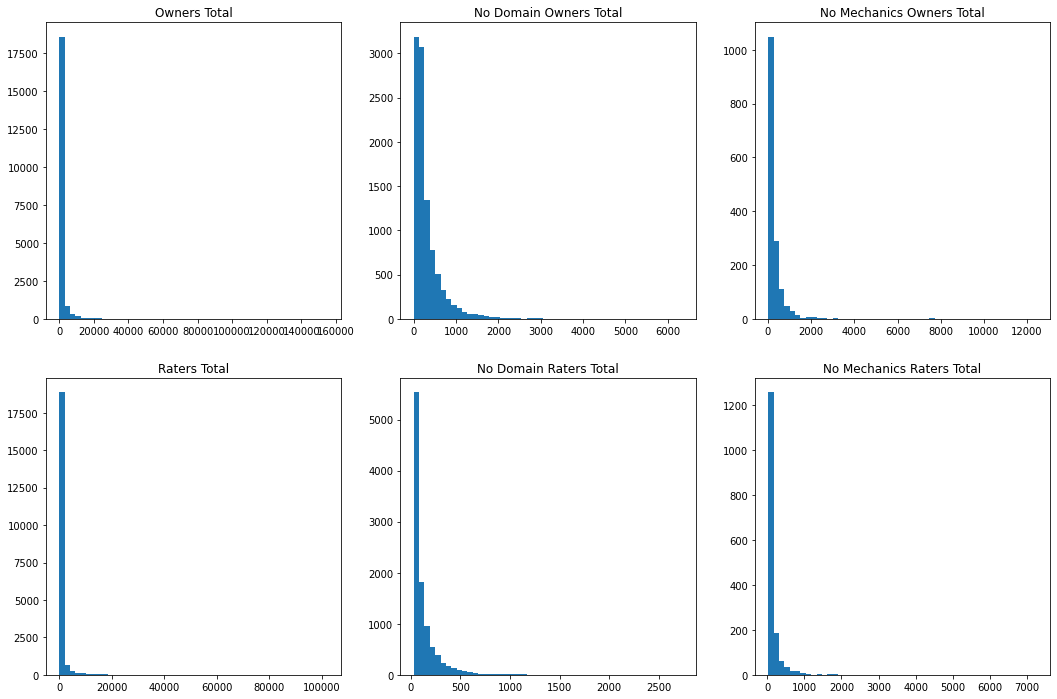

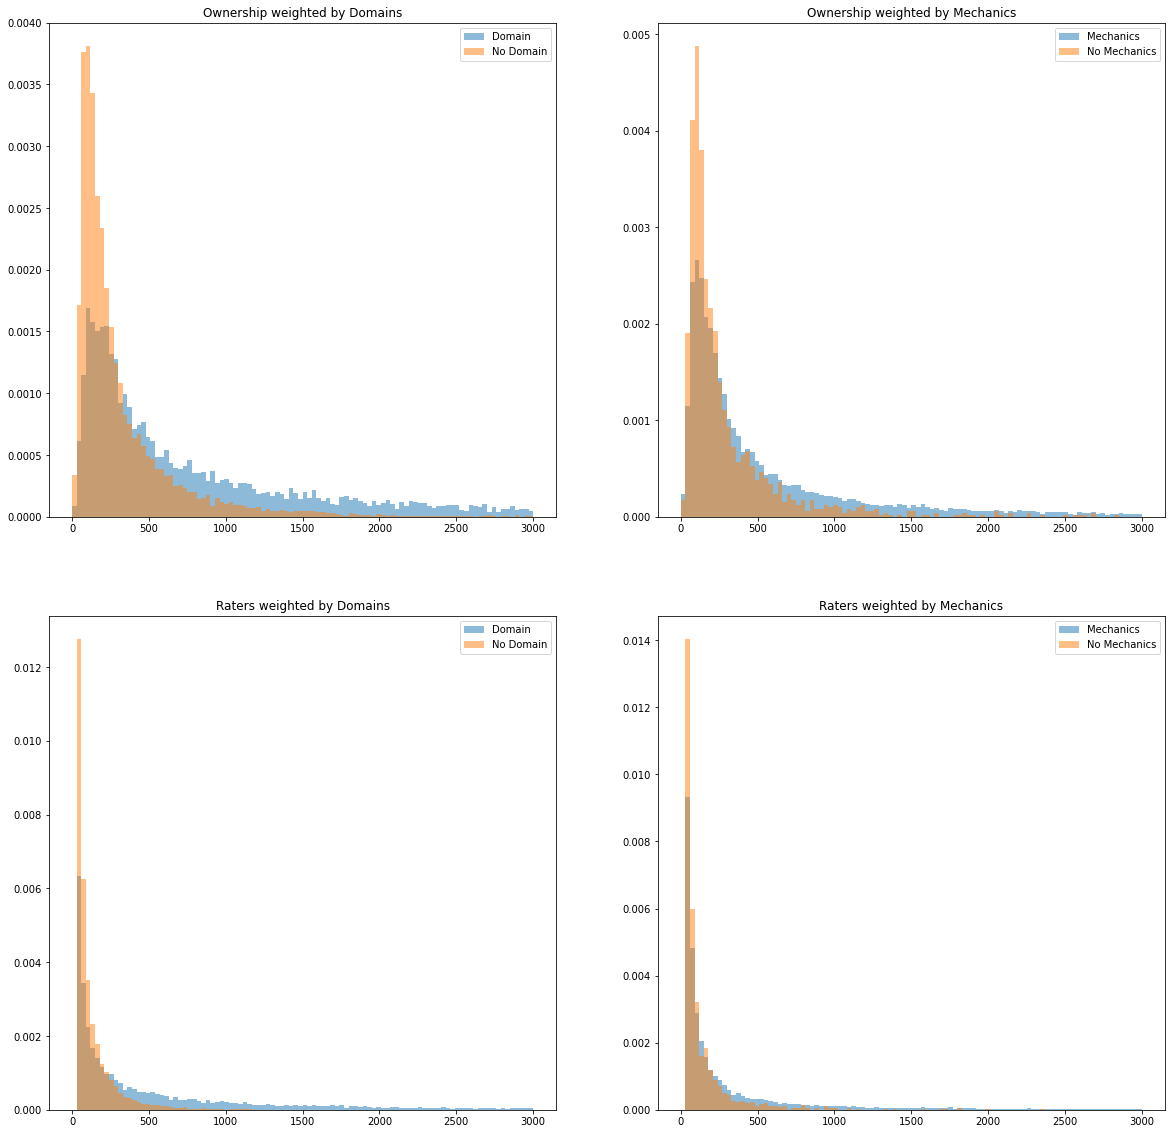

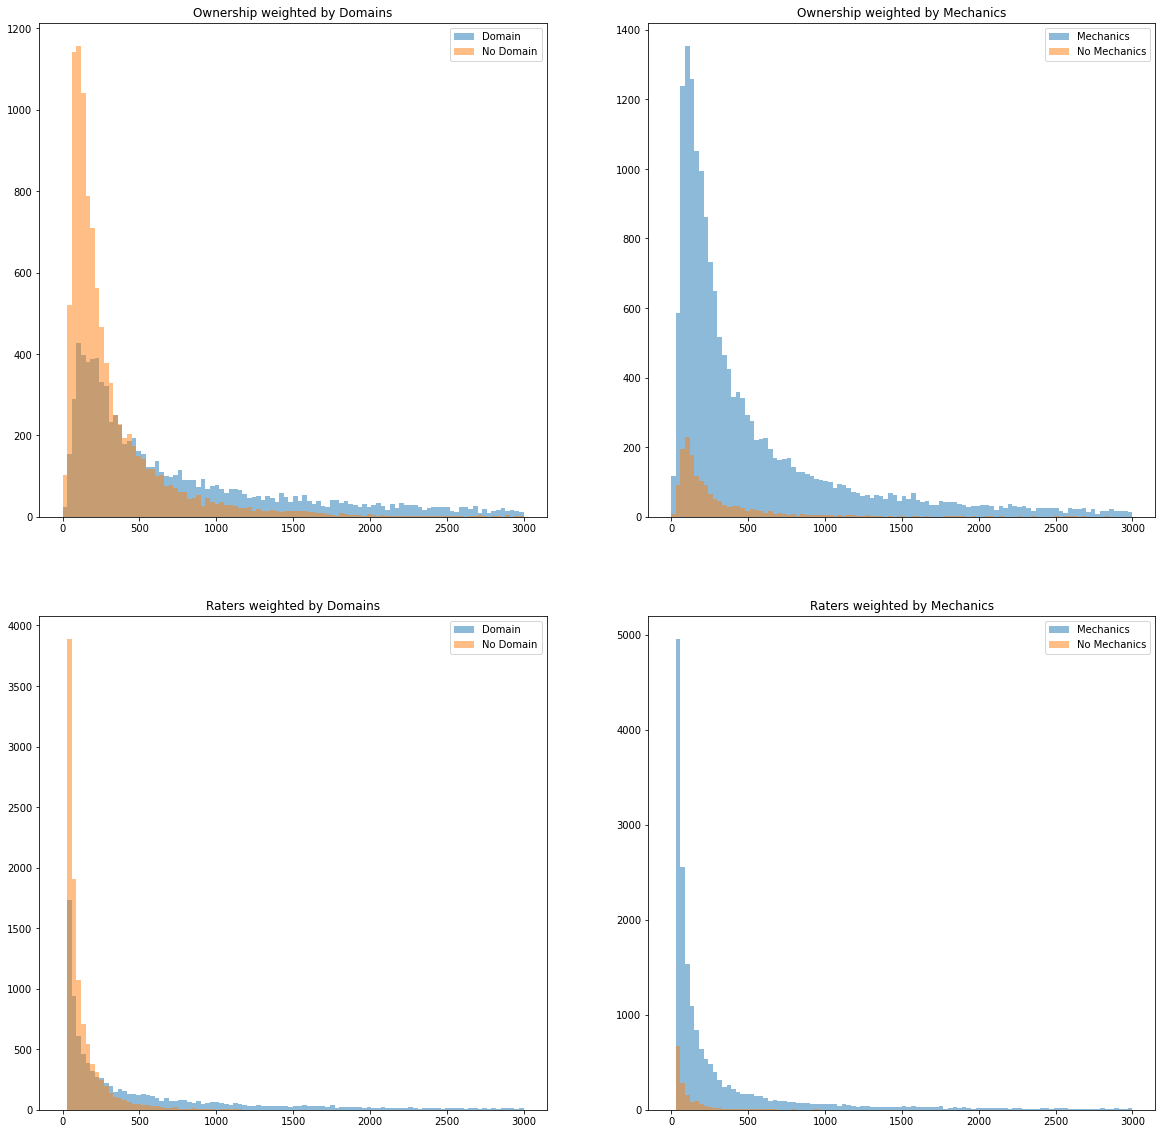

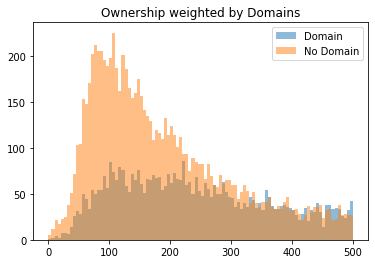

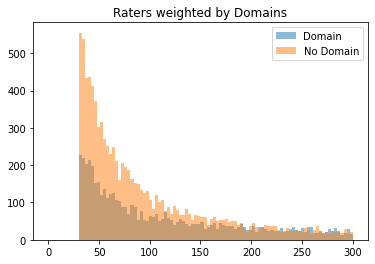

In [13]:
games_test = games
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(2, 3, 1)
plt.hist(game_df['Owned Users'], bins=50)
plt.title('Owners Total')
ax = fig.add_subplot(2, 3, 2)
plt.hist(game_df[game_df['Domains'].isnull()==True]['Owned Users'], bins=50)
plt.title('No Domain Owners Total')
ax = fig.add_subplot(2, 3, 3)
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Owned Users'], bins=50)
plt.title('No Mechanics Owners Total')
ax = fig.add_subplot(2, 3, 4)
plt.hist(game_df['Users Rated'], bins=50)
plt.title('Raters Total')
ax = fig.add_subplot(2, 3, 5)
plt.hist(game_df[game_df['Domains'].isnull()==True]['Users Rated'], bins=50)
plt.title('No Domain Raters Total')
ax = fig.add_subplot(2, 3, 6)
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Users Rated'], bins=50)
plt.title('No Mechanics Raters Total')
plt.show()

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
plt.hist(game_df[game_df['Domains'].notnull() == True]['Owned Users'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Owned Users'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Ownership weighted by Domains')
ax = fig.add_subplot(2, 2, 2)
plt.hist(game_df[game_df['Mechanics'].isnull() == False]['Owned Users'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='Mechanics')
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Owned Users'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='No Mechanics')
plt.legend(loc='upper right')
plt.title('Ownership weighted by Mechanics')
ax = fig.add_subplot(2, 2, 3)
plt.hist(game_df[game_df['Domains'].isnull() == False]['Users Rated'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Users Rated'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Raters weighted by Domains')
ax = fig.add_subplot(2, 2, 4)
plt.hist(game_df[game_df['Mechanics'].isnull() == False]['Users Rated'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='Mechanics')
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Users Rated'], bins=100, range=(0, 3000), density=True, alpha=0.5, label='No Mechanics')
plt.legend(loc='upper right')
plt.title('Raters weighted by Mechanics')
plt.show()

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
plt.hist(game_df[game_df['Domains'].notnull() == True]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Ownership weighted by Domains')
ax = fig.add_subplot(2, 2, 2)
plt.hist(game_df[game_df['Mechanics'].isnull() == False]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='Mechanics')
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='No Mechanics')
plt.legend(loc='upper right')
plt.title('Ownership weighted by Mechanics')
ax = fig.add_subplot(2, 2, 3)
plt.hist(game_df[game_df['Domains'].isnull() == False]['Users Rated'], bins=100, range=(0, 3000), alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Users Rated'], bins=100, range=(0, 3000), alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Raters weighted by Domains')
ax = fig.add_subplot(2, 2, 4)
plt.hist(game_df[game_df['Mechanics'].isnull() == False]['Users Rated'], bins=100, range=(0, 3000), alpha=0.5, label='Mechanics')
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Users Rated'], bins=100, range=(0, 3000), alpha=0.5, label='No Mechanics')
plt.legend(loc='upper right')
plt.title('Raters weighted by Mechanics')
plt.show()


plt.hist(game_df[game_df['Domains'].notnull() == True]['Owned Users'], bins=100, range=(0, 500), alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Owned Users'], bins=100, range=(0, 500), alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Ownership weighted by Domains')
plt.show()

plt.hist(game_df[game_df['Domains'].isnull() == False]['Users Rated'], bins=100, range=(0, 300), alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Users Rated'], bins=100, range=(0, 300), alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Raters weighted by Domains')
plt.show()

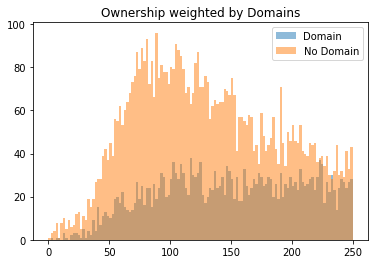

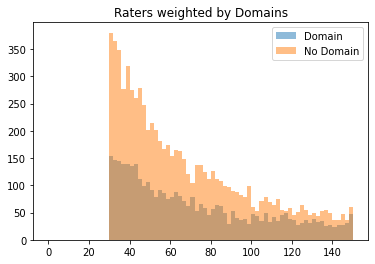

In [14]:

plt.hist(game_df[game_df['Domains'].notnull() == True]['Owned Users'], bins=125, range=(0, 250), alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Owned Users'], bins=125, range=(0, 250), alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Ownership weighted by Domains')
plt.show()

plt.hist(game_df[game_df['Domains'].isnull() == False]['Users Rated'], bins=75, range=(0, 150), alpha=0.5, label='Domain')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Users Rated'], bins=75, range=(0, 150), alpha=0.5, label='No Domain')
plt.legend(loc='upper right')
plt.title('Raters weighted by Domains')
plt.show()



In [15]:
print('Domain Percentages')
half_mod = games['BGG Rank'].quantile(0.5).round(0)
half_mod = half_mod.astype(int)
ten_mod = games['BGG Rank'].quantile(0.1).round(0)
ten_mod = ten_mod.astype(int)
one_mod = games['BGG Rank'].quantile(0.01).round(0)
one_mod = one_mod.astype(int)
half_own = games['Owned Users'].quantile(0.5).round(0)
half_own = half_own.astype(int)
ten_own = games['Owned Users'].quantile(0.90).round(0)
ten_own = ten_own.astype(int)
one_own = games['Owned Users'].quantile(0.99).round(0)
one_own = one_own.astype(int)

for domain in domains:
    total = (100*games[domain].sum()/len(games)).round(2)
    half = (100*games[games['BGG Rank']<half_mod][domain].sum()/len(games[games['BGG Rank']<half_mod])).round(2)
    ten = (100*games[games['BGG Rank']<ten_mod][domain].sum()/len(games[games['BGG Rank']<ten_mod])).round(2)
    one = (100*games[games['BGG Rank']<one_mod][domain].sum()/len(games[games['BGG Rank']<one_mod])).round(2)
    half_o = (100*games[games['Owned Users']>half_own][domain].sum()/len(games[games['Owned Users']>half_own])).round(2)
    ten_o = (100*games[games['Owned Users']>ten_own][domain].sum()/len(games[games['Owned Users']>ten_own])).round(2)
    one_o = (100*games[games['Owned Users']>one_own][domain].sum()/len(games[games['Owned Users']>one_own])).round(2)
    print('{} -  1%: {}, 10%: {}, 50%: {}, Total: {}'.format(domain, one, ten , half, total))
print('\nMechanic Percentages')    

one_c = []
ten_c = []
half_c = []
total_c = []
half_n = []
ten_n = []
one_n = []

for mechanic in mechanics:
    total = (100*games[mechanic].sum()/len(games)).round(2)
    half = (100*games[games['BGG Rank']<half_mod][mechanic].sum()/len(games[games['BGG Rank']<half_mod])).round(2)
    ten = (100*games[games['BGG Rank']<ten_mod][mechanic].sum()/len(games[games['BGG Rank']<ten_mod])).round(2)
    one = (100*games[games['BGG Rank']<one_mod][mechanic].sum()/len(games[games['BGG Rank']<one_mod])).round(2)
    half_o = (100*games[games['Owned Users']>half_own][mechanic].sum()/len(games[games['Owned Users']>half_own])).round(2)
    ten_o = (100*games[games['Owned Users']>ten_own][mechanic].sum()/len(games[games['Owned Users']>ten_own])).round(2)
    one_o = (100*games[games['Owned Users']>one_own][mechanic].sum()/len(games[games['Owned Users']>one_own])).round(2)
    one_c.append(one)
    ten_c.append(ten)
    half_c.append(half)
    total_c.append(total)
    half_n.append(half_o)
    ten_n.append(ten_o)
    one_n.append(one_o)
    #print('{} -  1%: {}, 10%: {}, 50%: {}, Total: {}'.format(mechanic, one, ten , half, total))

mech_tuples = list(zip(mechanics, one_c, ten_c, half_c, total_c, half_n, ten_n, one_n))  
mechanics_df = pd.DataFrame(mech_tuples, columns = ['Mechanic', 'Rank 1%', 'Rank 10%', 'Rank 50%', '100%', 'Owned 50%', 'Owned 10%', 'Owned 1%'])
print(mechanics_df.head(20))

Domain Percentages
Abstract Games -  1%: 3.45, 10%: 4.38, 50%: 4.82, Total: 5.27
Children's Games -  1%: 0.0, 10%: 0.98, 50%: 2.07, Total: 4.18
Customizable Games -  1%: 3.45, 10%: 2.85, 50%: 1.66, Total: 1.46
Family Games -  1%: 15.27, 10%: 27.9, 50%: 17.26, Total: 10.69
Party Games -  1%: 3.45, 10%: 6.05, 50%: 4.55, Total: 2.98
Strategy Games -  1%: 65.52, 10%: 48.43, 50%: 20.24, Total: 10.85
Thematic Games -  1%: 21.67, 10%: 19.09, 50%: 9.77, Total: 5.78
Wargames -  1%: 4.43, 10%: 8.66, 50%: 18.72, Total: 16.32

Mechanic Percentages
                     Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
0                      Acting     0.00      0.69      0.81  1.13       1.03       0.79      0.49
1             Action Drafting     4.43      1.03      0.24  0.13       0.23       0.94      2.94
2               Action Points    12.81     10.14      7.52  5.32       6.69       9.40      8.33
3                Action Queue     4.43      3.30      2.67  1.95      

In [16]:
print(mechanics_df.sort_values(by=['Rank 1%'], ascending=False).head(20), '\n')
print(mechanics_df.sort_values(by=['Rank 10%'], ascending=False).head(20), '\n')
print(mechanics_df.sort_values(by=['Rank 50%'], ascending=False).head(20), '\n')
print(mechanics_df.sort_values(by=['100%'], ascending=False).head(20), '\n')
print(mechanics_df.sort_values(by=['Owned 50%'], ascending=False).head(20), '\n')
print(mechanics_df.sort_values(by=['Owned 10%'], ascending=False).head(20), '\n')
print(mechanics_df.sort_values(by=['Owned 1%'], ascending=False).head(20), '\n')

print((100*len(mechanics_df[mechanics_df['Rank 1%'] < 1])/len(mechanics_df)), '\n')
print(mechanics_df[mechanics_df['Rank 1%'] < 1].sort_values(by=['100%'], ascending=False).head(20), '\n')
print(mechanics_df[mechanics_df['Rank 1%'] > 1].sort_values(by=['100%'], ascending=True).head(20), '\n')
print((100*len(mechanics_df[mechanics_df['Owned 1%'] < 1])/len(mechanics_df)), '\n')
print(mechanics_df[mechanics_df['Owned 1%'] < 1].sort_values(by=['100%'], ascending=False).head(20), '\n')
print(mechanics_df[mechanics_df['Owned 1%'] > 1].sort_values(by=['100%'], ascending=True).head(20), '\n')

                          Mechanic  Rank 1%  Rank 10%  Rank 50%   100%  Owned 50%  Owned 10%  Owned 1%
62                 Hand Management    41.87     35.68     24.90  20.42      24.85      36.37     48.53
175         Variable Player Powers    36.95     27.17     17.30  12.47      16.15      27.17     33.33
47                    Dice Rolling    30.05     30.71     31.87  27.91      30.52      32.09     29.90
27                   Card Drafting    29.06     19.78     11.16   8.51      10.41      18.26     20.10
140                 Set Collection    27.59     21.56     14.82  13.44      15.45      21.26     27.94
146          Solo / Solitaire Game    27.59     12.25      5.61   3.30       4.94      10.88     19.12
179               Worker Placement    22.66     12.35      5.95   3.69       5.29       9.45      9.31
39                Cooperative Game    18.23     12.65      9.04   6.90       8.40      12.60     19.61
95                   Modular Board    17.73     15.06     10.30   7.99   

In [17]:
def domain_sorter(domain):
    temp_total = []
    temp_pd = []
    temp_pm = []
    temp_ratio=[]
    temp_ave_rank = []
    temp_ave_own = []
    temp_ave_complex = []
    temp_ave_playtime = []
    temp_ave_d = []
    temp_ave_m = []
    temp_rank_diff = []
    temp_own_diff = []
    temp_complex_diff = []
    temp_playtime_diff = []
    temp_d_diff = []
    temp_m_diff = []
    
    for mechanic in mechanics:
        temp = games[(games[domain]==1) & (games[mechanic]==1)]
        temp_total.append(len(temp))
        temp_pd.append(100 * len(temp) / len(games[games[domain]==1]))
        temp_pm.append(100 * len(temp) / len(games[games[mechanic]==1]))
        temp_ave_rank.append(temp['BGG Rank'].mean())
        temp_rank_diff.append((games[games[domain]==1]['BGG Rank'].mean())-(temp['BGG Rank'].mean()))
        temp_ave_own.append(temp['Owned Users'].mean())
        temp_own_diff.append(temp['Owned Users'].mean()-(games[games[domain]==1]['Owned Users'].mean()))
        temp_ave_complex.append(temp['Complexity Average'].mean())
        temp_complex_diff.append((temp['Complexity Average'].mean())-(games[games[domain]==1]['Complexity Average'].mean()))
        temp_ave_playtime.append(temp['Play Time'].mean())
        temp_playtime_diff.append((temp['Play Time'].mean())-(games[games[domain]==1]['Play Time'].mean()))
        temp_ave_d.append(temp['Domains'].mean())
        temp_d_diff.append((temp['Domains'].mean())-(games[games[domain]==1]['Domains'].mean()))
        temp_ave_m.append(temp['Mechanics'].mean())
        temp_m_diff.append(temp['Mechanics'].mean()-(games[games[domain]==1]['Mechanics'].mean()))
        if len(temp) > 0:
            temp_ratio.append((100 * len(temp) / len(games[games[mechanic]==1]))/(100 * len(temp) / len(games[games[domain]==1])))
        else:
            temp_ratio.append(np.NaN)
    
    temp_tuples = list(zip(temp_total, temp_pd, temp_pm, temp_ratio, temp_ave_rank, temp_rank_diff, temp_ave_own, temp_own_diff, temp_ave_complex, temp_complex_diff, temp_ave_playtime, temp_playtime_diff, temp_ave_d, temp_d_diff, temp_ave_m, temp_m_diff))
    return pd.DataFrame(temp_tuples, index=(mechanics), columns=('Total', 'Domain %', 'Mech %', 'Ratio', 'Ave. Rank', 'Rank Diff.', 'Ave Owners', 'Owners Diff.', 'Ave Complexity', 'Complexity Diff.', 'Ave Play Time', 'Play Time Diff.', 'Ave Domains', 'Domain Diff.', 'Ave Mechanics', 'Mechanics Diff.'))

abstract_df = domain_sorter('Abstract Games')
print(len(abstract_df[abstract_df['Total']==0]))
children_df = domain_sorter('Children\'s Games')
print(len(children_df[children_df['Total']==0]))
custom_df = domain_sorter('Customizable Games')
print(len(custom_df[custom_df['Total']==0]))
family_df = domain_sorter('Family Games')
print(len(family_df[family_df['Total']==0]))
party_df = domain_sorter('Party Games')
print(len(party_df[party_df['Total']==0]))
strategy_df = domain_sorter('Strategy Games')
print(len(strategy_df[strategy_df['Total']==0]))
thematic_df = domain_sorter('Thematic Games')
print(len(thematic_df[thematic_df['Total']==0]))
wargame_df = domain_sorter('Wargames')
print(len(wargame_df[wargame_df['Total']==0]))

88
112
122
26
91
19
39
66


These next two are interesting, but eat up way too much space to just leave sitting here.

In [18]:
domain_dfs = [abstract_df, children_df, custom_df, family_df, party_df, strategy_df, thematic_df, wargame_df]
#Mechanics by Domain, with a focus on Domain %
#for x in range(len(domain_dfs)):
#    print(domains[x])
#    df = domain_dfs[x]
#    print(df[df['Domain %']>5].sort_values(by=('Total'), ascending=False))
#    print()

In [19]:
#Mechanics by Domain with a focus on Mechanics %
#for x in range(len(domain_dfs)):
#    print(domains[x])
#    df = domain_dfs[x]
#    print(df[df['Domain %']>4].sort_values(by=('Mech %'), ascending=False))
#    print()

In [20]:
#function for getting sub_df of mechanics that add value
def mech_p (domain_df):
    temp_mechs = domain_df[domain_df['Total']>0].index.values.tolist()
    temp_mechs_r = []
    temp_mechs_o = []
    for mech in temp_mechs:
        temp_rank = games[games[mech]==1]['BGG Rank'].mean()
        if domain_df.loc[mech]['Ave. Rank']<temp_rank:
            temp_mechs_r.append(mech)
        temp_own = games[games[mech]==1]['Owned Users'].mean()
        if domain_df.loc[mech]['Ave Owners']>temp_own:
            temp_mechs_o.append(mech)
    temp_df = domain_df[((domain_df['Rank Diff.']>0)&(domain_df.index.isin(temp_mechs_r))|((domain_df['Owners Diff.']>0)&(domain_df.index.isin(temp_mechs_o))))]
    return temp_df    

#For getting mechanics with significant usage in a domain
def significant_mechs(domain_df, d_val, m_val, r_val):
    return domain_df[(domain_df['Domain %']>d_val)&((domain_df['Mech %']>m_val)|(domain_df['Ratio']>r_val))]

#Adding them together.
def core_mechs(domain_df, d_val, m_val, r_val):
    temp_df1 = mech_p(domain_df)
    temp_df2 = significant_mechs(domain_df, d_val, m_val, r_val)
    temp_df = temp_df1[temp_df1.isin(temp_df2)]
    temp_df = temp_df.dropna()
    return temp_df

In [101]:
family_core = core_mechs(family_df, 5, 10, 2)
party_core = core_mechs(party_df, 5, 10, 2)
strategy_core = core_mechs(strategy_df, 5, 10, 2)
thematic_core = core_mechs(thematic_df, 5, 10, 2)
wargame_core = core_mechs(wargame_df, 5, 10, 2)

print(len(family_core))
print(len(party_core))
print(len(strategy_core))
print(len(thematic_core))
print(len(wargame_core))

10
4
19
14
9


In [22]:
#print(games['BGG Rank'].quantile(.25).round(0))
#Set variables for getting noteworthy mechanics
rank_threshold = games[games['Mechanics']>0]['BGG Rank'].quantile(.25).round(0)
rank_threshold = rank_threshold.astype('int')
owner_threshold = games[games['Mechanics']>0]['Owned Users'].quantile(0.75).round(0)
owner_threshold = owner_threshold.astype('int')

#Select mechanics that are above average in primary metrics.
#Start with lists to hold them
mech_ranked = []
mech_owned = []

for mechanic in mechanics:
    if (games[games[mechanic]==1]['BGG Rank'].mean() < rank_threshold) and (len(games[(games[mechanic]==1)&(games['BGG Rank']<rank_threshold)])>(len(games[(games[mechanic]==1)&(games['BGG Rank']>rank_threshold)]))):
        mech_ranked.append(mechanic)
    if (games[games[mechanic]==1]['Owned Users'].mean() > owner_threshold) and (len(games[(games[mechanic]==1)&(games['Owned Users']>owner_threshold)])>(len(games[(games[mechanic]==1)&(games['Owned Users']<owner_threshold)]))):
        mech_owned.append(mechanic)

print('Ranked: ', len(mech_ranked))
print('Owned: ', len(mech_owned))

print('Ave Mechs: ', games[games['Mechanics']>0]['Mechanics'].mean())
print('Ranked Mechs: ', games[(games['Mechanics']>0)&(games['BGG Rank']<rank_threshold)]['Mechanics'].mean())
print('Owned Mechs: ', games[(games['Mechanics']>0)&(games['Owned Users']>owner_threshold)]['Mechanics'].mean())

Ranked:  76
Owned:  98
Ave Mechs:  3.027802977746945
Ranked Mechs:  4.087532023911187
Owned Mechs:  3.976520811099253


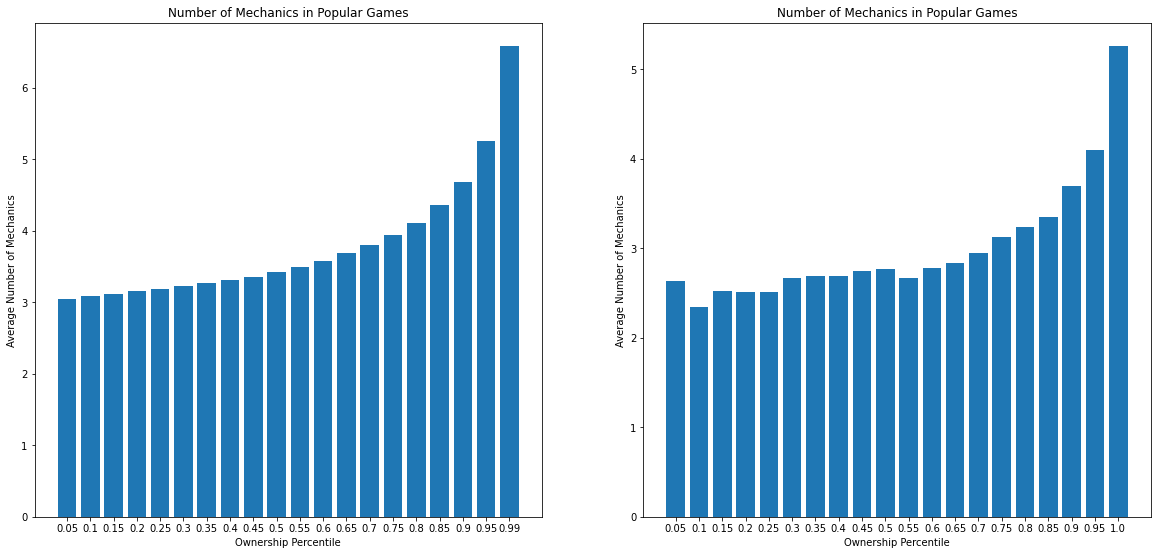

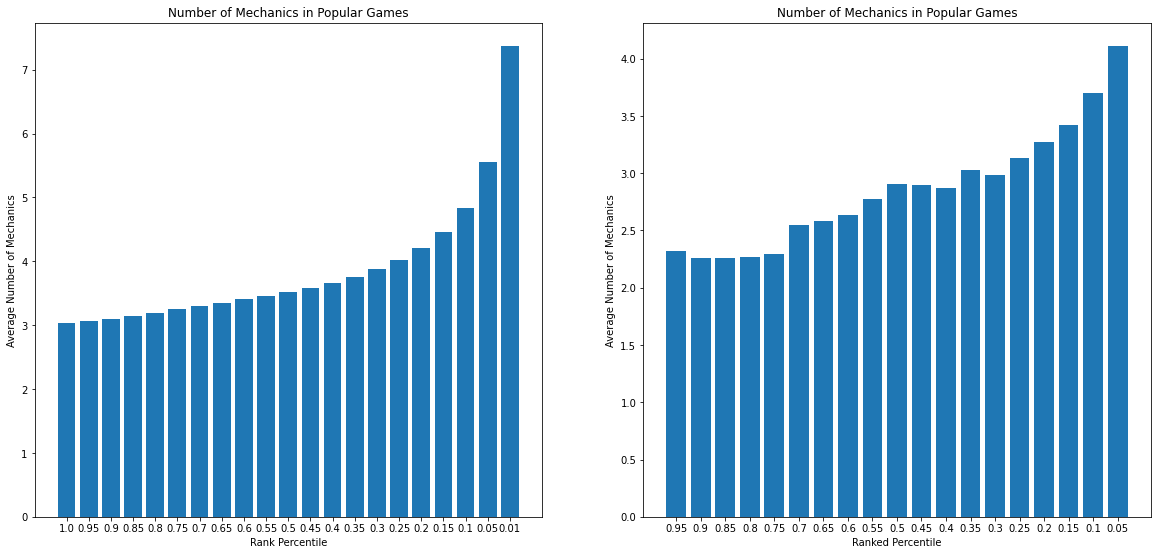

In [23]:
#Got some unexpected results there.  Let's see if there's a relationship between ownership numbers and number of mechanics

#test = [x/100 for x in range(60, 100, 5)]
#print(test)

quantiles = [x/100 for x in range(5, 100, 5)]
quantiles.append(0.99)
mech_y = []

for quantile in quantiles:
    threshold = games['Owned Users'].quantile(quantile).round(0)
    threshold = threshold.astype('int')
    mech_y.append(games[(games['Mechanics']>0)&(games['Owned Users']>threshold)]['Mechanics'].mean())
    
    
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
plt.bar(range(len(quantiles)), mech_y)
ax.set_xticks(range(len(quantiles)))
ax.set_xticklabels(quantiles)
plt.title('Number of Mechanics in Popular Games')
plt.xlabel('Ownership Percentile')
plt.ylabel('Average Number of Mechanics')


quantiles = [x/100 for x in range(0, 101, 5)]
mech_y = []

for x in range(len(quantiles)-1):
    threshold_one = games['Owned Users'].quantile(quantiles[x]).round(0)
    threshold_one = threshold_one.astype('int')
    threshold_two = games['Owned Users'].quantile(quantiles[x+1]).round(0)
    threshold_two = threshold_two.astype('int')
    mech_y.append(games[(games['Mechanics']>0)&(games['Owned Users']>=threshold_one)&(games['Owned Users']<threshold_two)]['Mechanics'].mean())

ax = fig.add_subplot(2, 2, 2)
plt.bar(range(len(quantiles)-1), mech_y)
ax.set_xticks(range(len(quantiles)-1))
ax.set_xticklabels(quantiles[1:])
plt.title('Number of Mechanics in Popular Games')
plt.xlabel('Ownership Percentile')
plt.ylabel('Average Number of Mechanics')

quantiles = [x/100 for x in range(100, 4, -5)]
quantiles.append(0.01)
mech_y = []

for quantile in quantiles:
    threshold = games['BGG Rank'].quantile(quantile).round(0)
    threshold = threshold.astype('int')
    mech_y.append(games[(games['Mechanics']>0)&(games['BGG Rank']<threshold)]['Mechanics'].mean())
    
    
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 3)
plt.bar(range(len(quantiles)), mech_y)
ax.set_xticks(range(len(quantiles)))
ax.set_xticklabels(quantiles)
plt.title('Number of Mechanics in Popular Games')
plt.xlabel('Rank Percentile')
plt.ylabel('Average Number of Mechanics')


quantiles = [x/100 for x in range(100, 0, -5)]
mech_y = []

for x in range(len(quantiles)-1):
    threshold_one = games['BGG Rank'].quantile(quantiles[x]).round(0)
    threshold_one = threshold_one.astype('int')
    threshold_two = games['BGG Rank'].quantile(quantiles[x+1]).round(0)
    threshold_two = threshold_two.astype('int')
    mech_y.append(games[(games['Mechanics']>0)&(games['BGG Rank']<=threshold_one)&(games['BGG Rank']>threshold_two)]['Mechanics'].mean())

ax = fig.add_subplot(2, 2, 4)
plt.bar(range(len(quantiles)-1), mech_y)
ax.set_xticks(range(len(quantiles)-1))
ax.set_xticklabels(quantiles[1:])
plt.title('Number of Mechanics in Popular Games')
plt.xlabel('Ranked Percentile')
plt.ylabel('Average Number of Mechanics')
plt.show()


In [24]:
print(games[games['Mechanics']>0]['Mechanics'].mean())
print(mech_ranked)
print(mech_owned)

3.027802977746945
['Action Drafting', 'Action Retrieval', 'Advantage Token', 'Auction: Dexterity', 'Auction: Dutch', 'Auction: Dutch Priority', 'Auction: English', 'Auction: Fixed Placement', 'Auction: Once Around', 'Auction: Sealed Bid', 'Auction: Turn Order Until Pass', 'Automatic Resource Growth', 'Bias', 'Bingo', 'Bribery', 'Catch the Leader', 'Chaining', 'Closed Economy Auction', 'Command Cards', 'Communication Limits', 'Connections', 'Constrained Bidding', 'Contracts', 'Deck Construction', 'Delayed Purchase', 'Die Icon Resolution', 'Different Worker Types', 'Drafting', 'Elapsed Real Time Ending', 'End Game Bonuses', 'Follow', 'Force Commitment', 'Grid Coverage', 'Highest-Lowest Scoring', 'I Cut You Choose', 'Income', 'Increase Value of Unchosen Resources', 'Interrupts', 'Investment', 'Kill Steal', 'Layering', 'Legacy Game', 'Loans', 'Map Addition', 'Market', 'Melding and Splaying', 'Move Through Deck', 'Movement Template', 'Multiple-Lot Auction', 'Narrative Choice / Paragraph', '

In [25]:
core_domains = [family_core, party_core, strategy_core, thematic_core]

for domain in core_domains:
    print(domain.index.values)

['Area Majority / Influence' 'Card Drafting' 'Hand Management'
 'Modular Board' 'Pattern Building' 'Push Your Luck' 'Set Collection'
 'Simultaneous Action Selection' 'Take That' 'Tile Placement']
['Acting' 'Player Elimination' 'Team-Based Game' 'Voting']
['Action Points' 'Area Majority / Influence' 'Area Movement'
 'Auction/Bidding' 'Card Drafting' 'Deck Bag and Pool Building'
 'Grid Movement' 'Hand Management' 'Modular Board'
 'Network and Route Building' 'Point to Point Movement' 'Set Collection'
 'Simultaneous Action Selection' 'Solo / Solitaire Game' 'Take That'
 'Tile Placement' 'Trading' 'Variable Player Powers' 'Worker Placement']
['Action Points' 'Area Movement' 'Cooperative Game'
 'Deck Bag and Pool Building' 'Dice Rolling' 'Grid Movement'
 'Modular Board' 'Player Elimination' 'Role Playing'
 'Scenario / Mission / Campaign Game' 'Solo / Solitaire Game'
 'Storytelling' 'Team-Based Game' 'Variable Player Powers']


In [26]:
for domain in core_domains:
    print(domain[domain.index.isin(mech_ranked)==True].index.values)
    print(domain[domain.index.isin(mech_owned)==True].index.values)
    print()

[]
[]

[]
[]

[]
['Solo / Solitaire Game']

[]
['Solo / Solitaire Game']



In [27]:
for domain in core_domains:
    temp_mechs = domain.index.values.tolist()
    for mech in temp_mechs:
        print(mechanics_df[mechanics_df['Mechanic']==mech])
    print()

                    Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
9  Area Majority / Influence    17.24     18.11     11.02  7.39       9.66      16.04     10.29
         Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
27  Card Drafting    29.06     19.78     11.16  8.51      10.41      18.26      20.1
           Mechanic  Rank 1%  Rank 10%  Rank 50%   100%  Owned 50%  Owned 10%  Owned 1%
62  Hand Management    41.87     35.68      24.9  20.42      24.85      36.37     48.53
         Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
95  Modular Board    17.73     15.06      10.3  7.99       9.94      14.52     14.22
             Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
110  Pattern Building     3.94      3.64      3.85  3.75       3.44       3.79      3.92
           Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
122  Push Your Luck      6.

In [28]:
def compare_mechanics(mechanic):
    print(mechanic)
    for x in range(len(domain_dfs)):
        df = domain_dfs[x]
        print(domains[x], '\n', df.loc[[mechanic]], '\n')
        print()
    return

#compare_mechanics('Hand Management')
#compare_mechanics('Dice Rolling')

In [29]:
print((100/8)+(12.5/4))

15.625


In [30]:
core = ['BGG Rank', 'Owned Users', 'Users Rated', 'Rating Average']
print('Whole Set:')
print(game_df[core].describe())
print('\nDomainless:')
print(game_df[game_df['Domains'].isnull()==True][core].describe())
print('\nMechanicless:')
print(game_df[game_df['Mechanics'].isnull()==True][core].describe())

Whole Set:
           BGG Rank    Owned Users    Users Rated  Rating Average
count  20343.000000   20320.000000   20343.000000    20343.000000
mean   10172.890429    1408.457628     840.971391        6.403227
std     5872.831597    5040.179315    3511.562220        0.935911
min        1.000000       0.000000      30.000000        1.050000
25%     5087.500000     146.000000      55.000000        5.820000
50%    10173.000000     309.000000     120.000000        6.430000
75%    15258.500000     864.000000     385.000000        7.030000
max    20344.000000  155312.000000  102214.000000        9.580000

Domainless:
           BGG Rank   Owned Users   Users Rated  Rating Average
count  10159.000000  10136.000000  10159.000000    10159.000000
mean   12495.865046    324.246448    130.468747        6.217476
std     4787.329129    392.391102    152.486826        0.961569
min      664.000000      0.000000     30.000000        1.050000
25%     8732.500000    109.000000     46.000000        5.61500

In [31]:
test_df = mechanics_df[mechanics_df['Mechanic'].str.contains(':')]
print(test_df['Mechanic'])
print(test_df.sort_values(by='Rank 1%', ascending=False), '\n')
print(test_df.sort_values(by='100%', ascending=False), '\n')

13                 Auction: Dexterity
14                     Auction: Dutch
15            Auction: Dutch Priority
16                   Auction: English
17           Auction: Fixed Placement
18               Auction: Once Around
19                Auction: Sealed Bid
20     Auction: Turn Order Until Pass
167               Turn Order: Auction
168          Turn Order: Claim Action
169            Turn Order: Pass Order
170           Turn Order: Progressive
171                Turn Order: Random
172            Turn Order: Role Order
173            Turn Order: Stat-Based
Name: Mechanic, dtype: object
                           Mechanic  Rank 1%  Rank 10%  Rank 50%  100%  Owned 50%  Owned 10%  Owned 1%
170         Turn Order: Progressive     5.91      1.53      0.47  0.28       0.42       1.43      5.88
168        Turn Order: Claim Action     5.42      1.33      0.31  0.16       0.30       1.13      3.92
173          Turn Order: Stat-Based     3.94      0.98      0.31  0.16       0.28       0.8

In [32]:
old_games = games[games['Year Published']<1980]
print(old_games[['Name', 'Year Published', 'Owned Users', 'BGG Rank']].sort_values(by='Owned Users', ascending=False).head(30))
print('\n', games[['Name', 'Year Published', 'Owned Users', 'BGG Rank', 'Min Players', 'Max Players', 'Strategy Games', 'Family Games', 'Party Games', 'Complexity Average', 'Play Time']].sort_values(by='Owned Users', ascending=False).head(30))

                   Name  Year Published  Owned Users  BGG Rank
1809           Scrabble          1948.0      47733.0      1810
19513              Risk          1959.0      47143.0     19515
20335          Monopoly          1933.0      40255.0     20337
434               Chess          1475.0      40068.0       435
20227               UNO          1971.0      38337.0     20229
8601               Clue          1949.0      30807.0      8603
1629           Rummikub          1977.0      25802.0      1630
2591           Stratego          1946.0      23834.0      2593
275             Acquire          1964.0      23111.0       276
20167           Yahtzee          1956.0      20650.0     20169
172                  Go         -2200.0      20398.0       173
604           Diplomacy          1959.0      20189.0       605
1275         Backgammon         -3000.0      17747.0      1276
20336  The Game of Life          1960.0      16692.0     20338
684              Perudo          1800.0      16159.0   

In [33]:
corr, p = pearsonr(games['Owned Users'], games['Users Rated'])
print('Owned vs. Rsviews Pearsons: %.3f' % corr)

corr, p = pearsonr(games['Owned Users'], games['Rating Average'])
print('Owned vs. Average Rating Pearsons: %.3f' % corr)

corr, p = pearsonr(games['Owned Users'], games['BGG Rank'])
print('Owned vs. BGG Rank: %.3f' % corr)

corr, p = pearsonr(games['Rating Average'], games['Users Rated'])
print('Reviews vs. Average Rating Pearsons: %.3f' % corr)

corr, p = pearsonr(games['BGG Rank'], games['Users Rated'])
print('Reviews vs. Rank Pearsons: %.3f' % corr)

corr, p = pearsonr(games['Rating Average'], games['BGG Rank'])
print('Rating vs. Ranking: %.3f' % corr)

corr, p = pearsonr(games[games['Users Rated'] >= 100]['Rating Average'], games[games['Users Rated'] >= 100]['BGG Rank'])
print('Min 100 Rankings Rating vs. Ranking: %.3f' % corr)

corr, p = pearsonr(games[games['Owned Users'] >= 100]['Rating Average'], games[games['Owned Users'] >= 100]['BGG Rank'])
print('Min 100 Rankings Rating vs. Ranking: %.3f' % corr)

corr, p = pearsonr(games['Owned Users'], games['Complexity Average'])
print('Owned vs. Complexity: %.3f' % corr)
corr, p = pearsonr(games['Owned Users'], games['Play Time'])
print('Owned vs. Play Time: %.3f' % corr)
corr, p = pearsonr(games['BGG Rank'], games['Complexity Average'])
print('Rank vs. Complexity: %.3f' % corr)
corr, p = pearsonr(games['BGG Rank'], games['Play Time'])
print('Rank vs. Play Time: %.3f' % corr)
corr, p = pearsonr(games[games['BGG Rank']<one_mod]['Owned Users'], games[games['BGG Rank']<one_mod]['BGG Rank'])
print('Owned vs. BGG Rank -Top 200: %.3f' % corr)
corr, p = pearsonr(games[games['Mechanics']>0]['BGG Rank'], games[games['Mechanics']>0]['Mechanics'])
print('Rank vs. Mechanics: %.3f' % corr)
corr, p = pearsonr(games[games['Mechanics']>0]['Owned Users'], games[games['Mechanics']>0]['Mechanics'])
print('Owned vs. Mechanics: %.3f' % corr)
threshold = games[games['Mechanics']>0]['Owned Users'].quantile(0.85).round(0)
threshold = threshold.astype('int')
corr, p = pearsonr(games[(games['Mechanics']>0)&(games['Owned Users']>threshold)]['Owned Users'], games[(games['Mechanics']>0)&(games['Owned Users']>threshold)]['Mechanics'])
print('Owned vs. Mechanics - 85th Percentile: %.3f' % corr)
threshold = games[games['Mechanics']>0]['Owned Users'].quantile(0.95).round(0)
threshold = threshold.astype('int')
corr, p = pearsonr(games[(games['Mechanics']>0)&(games['Owned Users']>threshold)]['Owned Users'], games[(games['Mechanics']>0)&(games['Owned Users']>threshold)]['Mechanics'])
print('Owned vs. Mechanics - 95th Percentile: %.3f' % corr)


Owned vs. Rsviews Pearsons: 0.986
Owned vs. Average Rating Pearsons: 0.177
Owned vs. BGG Rank: -0.329
Reviews vs. Average Rating Pearsons: 0.170
Reviews vs. Rank Pearsons: -0.311
Rating vs. Ranking: -0.739
Min 100 Rankings Rating vs. Ranking: -0.821
Min 100 Rankings Rating vs. Ranking: -0.773
Owned vs. Complexity: 0.087
Owned vs. Play Time: -0.003
Rank vs. Complexity: -0.383
Rank vs. Play Time: -0.046
Owned vs. BGG Rank -Top 200: -0.251
Rank vs. Mechanics: -0.330
Owned vs. Mechanics: 0.261
Owned vs. Mechanics - 85th Percentile: 0.274
Owned vs. Mechanics - 95th Percentile: 0.218


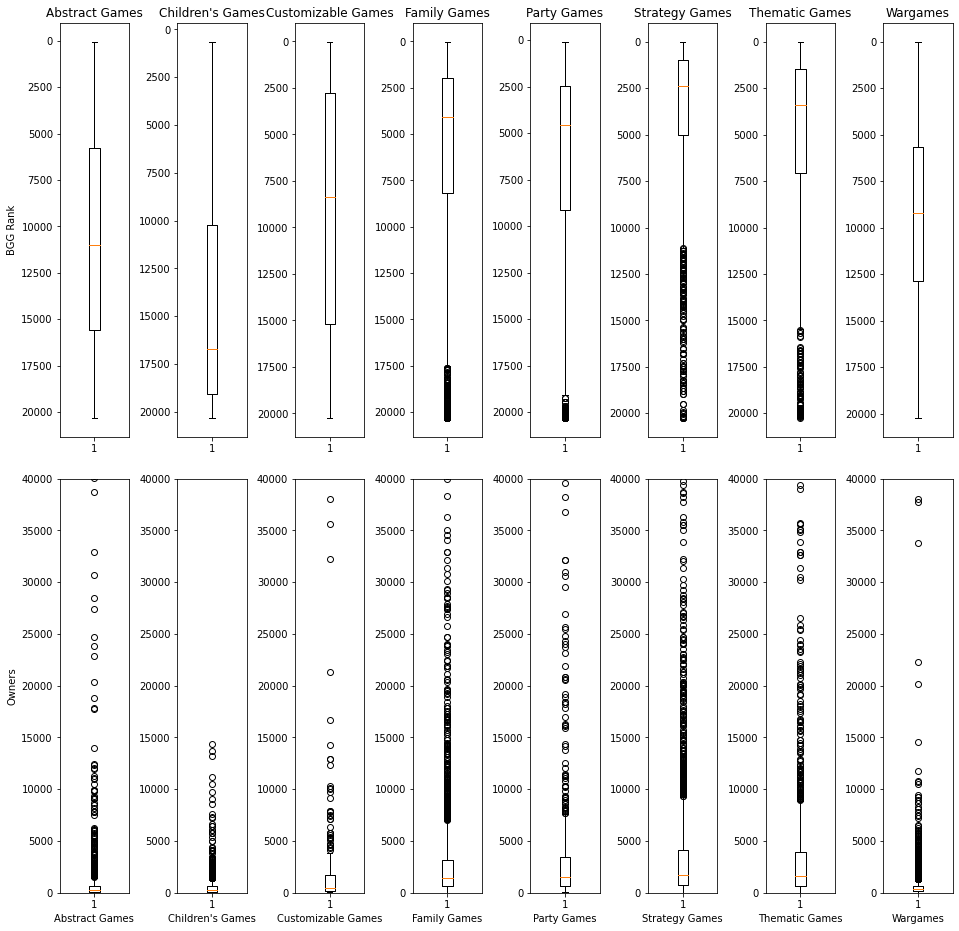

In [34]:
fig = plt.figure(figsize=(16, 16))
for x in range(len(domains)):
    ax = fig.add_subplot(2, 8, x+1)
    plt.boxplot(games[games[domains[x]]==1]['BGG Rank'])
    ax.invert_yaxis()
    plt.title(domains[x])
    if x == 0:
        plt.ylabel('BGG Rank')
    ax = fig.add_subplot(2, 8, x+9)
    plt.boxplot(games[games[domains[x]]==1]['Owned Users'])
    plt.ylim(0, 40000)
    plt.xlabel(domains[x])
    if x==0:
        plt.ylabel('Owners')
plt.subplots_adjust(wspace=0.7, hspace=0.1)
plt.savefig('Domain Overview 2.png')
plt.show()        

54
4      0.313435
2      0.200197
6      0.182972
5      0.138435
8      0.056742
10     0.018701
1      0.015354
7      0.015207
3      0.013386
12     0.011516
0      0.007923
99     0.006693
9      0.003593
16     0.003100
20     0.003051
15     0.002116
30     0.000787
24     0.000787
100    0.000689
36     0.000591
14     0.000541
50     0.000443
18     0.000443
11     0.000443
13     0.000344
17     0.000295
40     0.000246
22     0.000197
21     0.000148
999    0.000148
32     0.000148
52     0.000098
33     0.000098
28     0.000098
75     0.000098
38     0.000049
31     0.000049
163    0.000049
68     0.000049
45     0.000049
60     0.000049
42     0.000049
362    0.000049
23     0.000049
26     0.000049
48     0.000049
41     0.000049
25     0.000049
69     0.000049
200    0.000049
120    0.000049
34     0.000049
64     0.000049
127    0.000049
Name: Max Players, dtype: float64
11
2     0.691880
1     0.160827
3     0.116191
4     0.023327
5     0.002805
0     0.002264
6     

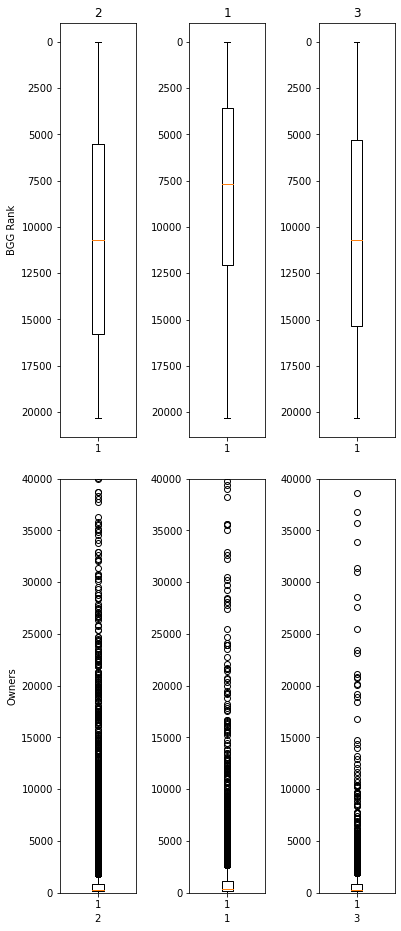

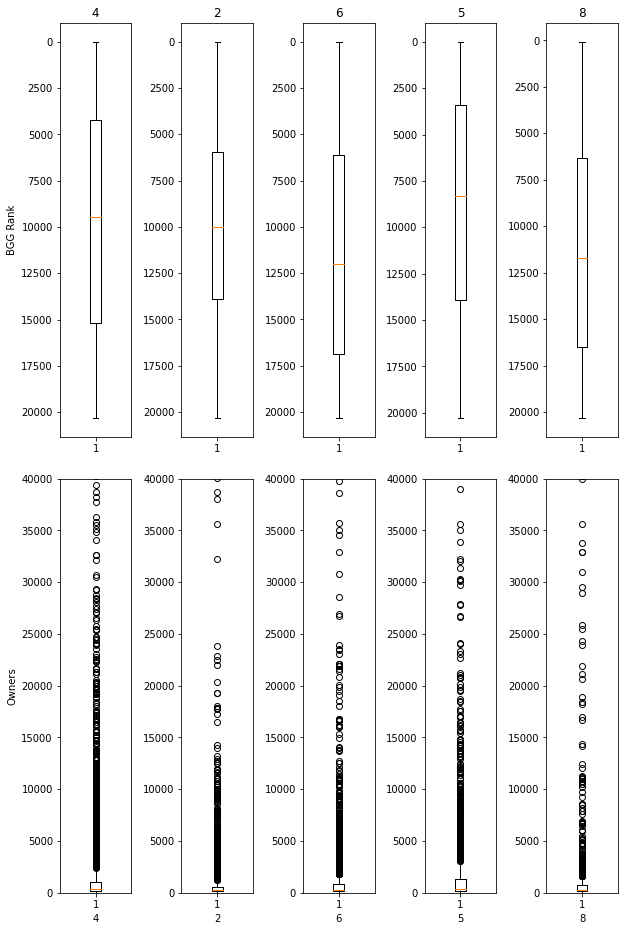

In [35]:
print(len(games['Max Players'].unique()))
print(games['Max Players'].value_counts(normalize=True))
print(len(games['Min Players'].unique()))
print(games['Min Players'].value_counts(normalize=True))

max_list = [4, 2, 6, 5, 8]
min_list = [2, 1, 3]

fig = plt.figure(figsize=(6, 16))
for x in range(len(min_list)):
    ax = fig.add_subplot(2, 3, x+1)
    plt.boxplot(games[games['Min Players']==min_list[x]]['BGG Rank'])
    ax.invert_yaxis()
    plt.title(min_list[x])
    if x == 0:
        plt.ylabel('BGG Rank')
    ax = fig.add_subplot(2, 3, x+4)
    plt.boxplot(games[games['Min Players']==min_list[x]]['Owned Users'])
    plt.ylim(0, 40000)
    plt.xlabel(min_list[x])
    if x==0:
        plt.ylabel('Owners')
plt.subplots_adjust(wspace=0.7, hspace=0.1)
#plt.savefig('Domain Overview.png')
plt.show()        

fig = plt.figure(figsize=(10, 16))
for x in range(len(max_list)):
    ax = fig.add_subplot(2, 5, x+1)
    plt.boxplot(games[games['Max Players']==max_list[x]]['BGG Rank'])
    ax.invert_yaxis()
    plt.title(max_list[x])
    if x == 0:
        plt.ylabel('BGG Rank')
    ax = fig.add_subplot(2, 5, x+6)
    plt.boxplot(games[games['Max Players']==max_list[x]]['Owned Users'])
    plt.ylim(0, 40000)
    plt.xlabel(max_list[x])
    if x==0:
        plt.ylabel('Owners')
plt.subplots_adjust(wspace=0.7, hspace=0.1)
#plt.savefig('Domain Overview.png')
plt.show()        

In [36]:
test = games['Max Players'].value_counts(normalize=True)
print(type(test))
print(test)
test2 = test.where(test>0.05)
test2=test2.dropna()
print(test2)

<class 'pandas.core.series.Series'>
4      0.313435
2      0.200197
6      0.182972
5      0.138435
8      0.056742
10     0.018701
1      0.015354
7      0.015207
3      0.013386
12     0.011516
0      0.007923
99     0.006693
9      0.003593
16     0.003100
20     0.003051
15     0.002116
30     0.000787
24     0.000787
100    0.000689
36     0.000591
14     0.000541
50     0.000443
18     0.000443
11     0.000443
13     0.000344
17     0.000295
40     0.000246
22     0.000197
21     0.000148
999    0.000148
32     0.000148
52     0.000098
33     0.000098
28     0.000098
75     0.000098
38     0.000049
31     0.000049
163    0.000049
68     0.000049
45     0.000049
60     0.000049
42     0.000049
362    0.000049
23     0.000049
26     0.000049
48     0.000049
41     0.000049
25     0.000049
69     0.000049
200    0.000049
120    0.000049
34     0.000049
64     0.000049
127    0.000049
Name: Max Players, dtype: float64
4    0.313435
2    0.200197
6    0.182972
5    0.138435
8    0.056

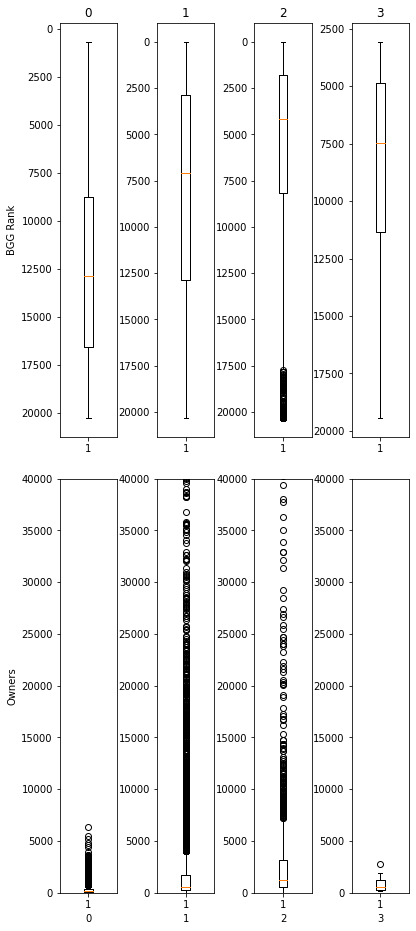

In [37]:
fig = plt.figure(figsize=(8, 16))
for x in range(4):
    ax = fig.add_subplot(2, 5, x+1)
    plt.boxplot(games[games['Domains']==x]['BGG Rank'])
    ax.invert_yaxis()
    plt.title(x)
    if x == 0:
        plt.ylabel('BGG Rank')
    ax = fig.add_subplot(2, 5, x+6)
    plt.boxplot(games[games['Domains']==x]['Owned Users'])
    plt.ylim(0, 40000)
    plt.xlabel(x)
    if x==0:
        plt.ylabel('Owners')
plt.subplots_adjust(wspace=0.7, hspace=0.1)
#plt.savefig('Domain Overview.png')
plt.show()        

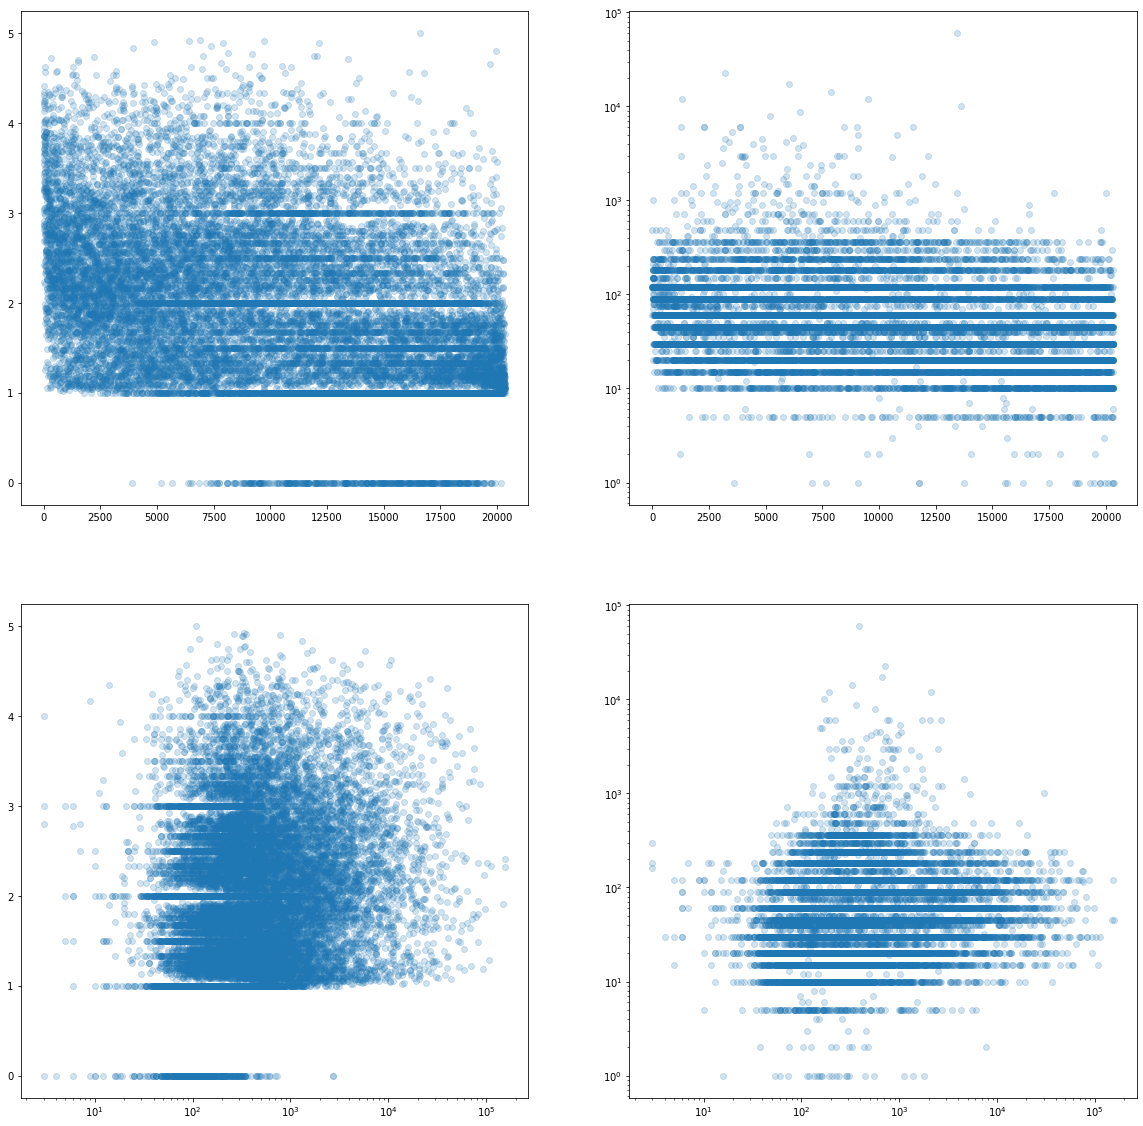

In [38]:
#Checking for correlation between complexity, playtime, and success.
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
plt.scatter(games['BGG Rank'], games['Complexity Average'], alpha=0.2)
ax=fig.add_subplot(2, 2, 2)
plt.scatter(games['BGG Rank'], games['Play Time'], alpha=0.2)
ax.set_yscale('log')
ax=fig.add_subplot(2, 2, 3)
plt.scatter(games['Owned Users'], games['Complexity Average'], alpha=0.2)
ax.set_xscale('log')
ax=fig.add_subplot(2, 2, 4)
plt.scatter(games['Owned Users'], games['Play Time'], alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

#This is a resounding no.


 Year Published


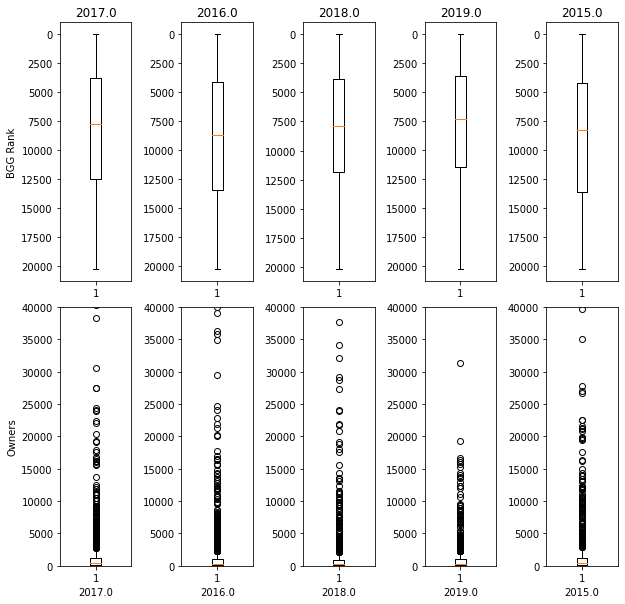


 Min Players


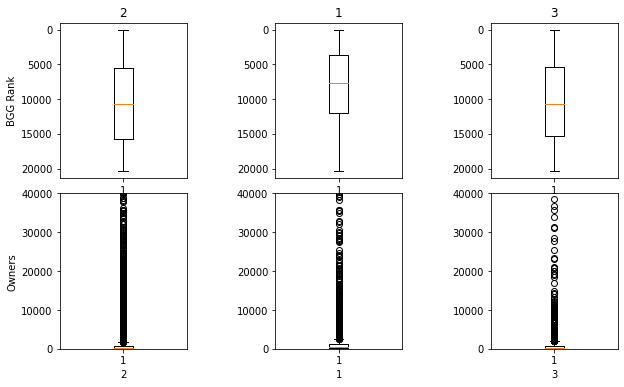


 Max Players


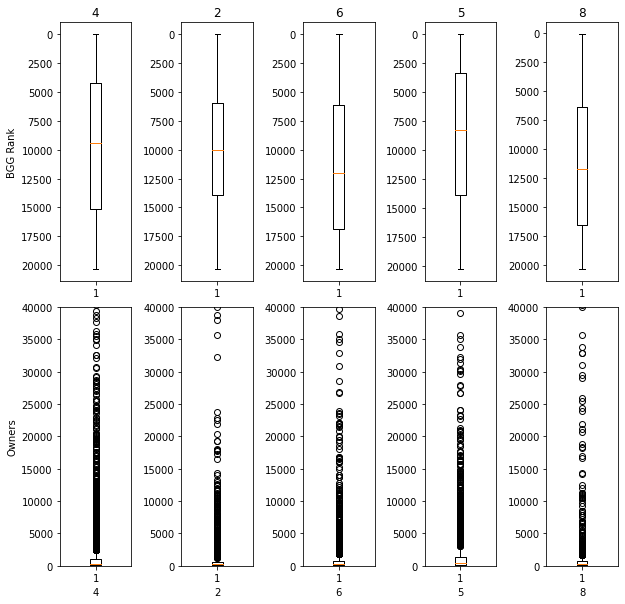


 Play Time


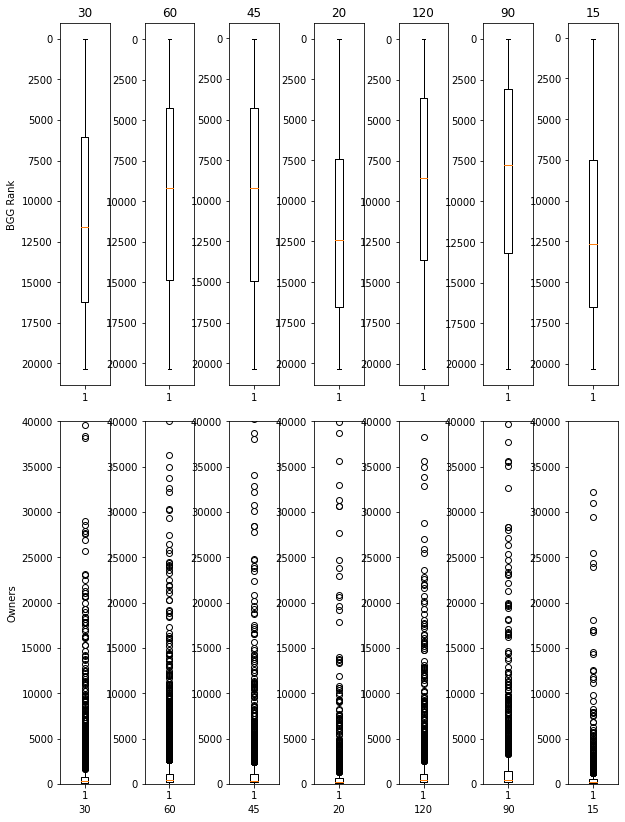


 Min Age


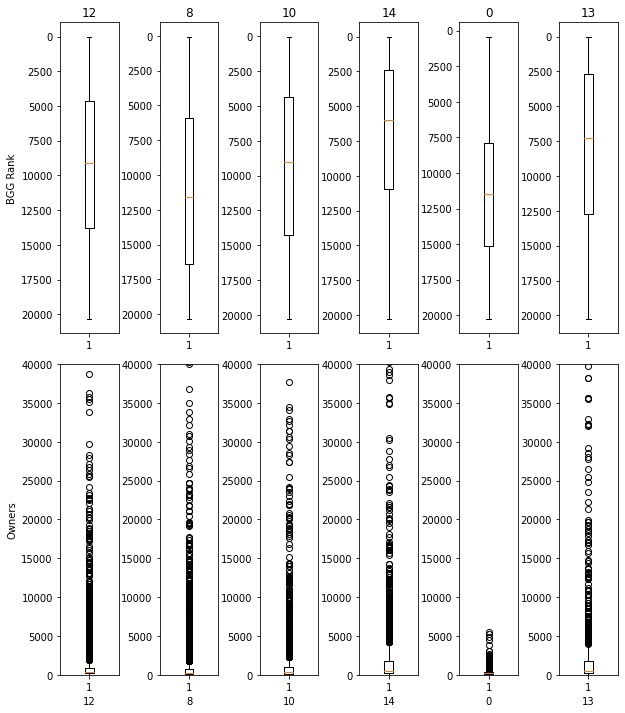

In [39]:
metrics = ['Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age']
for metric in metrics:
    print('\n', metric)
    temp = games[metric].value_counts(normalize=True)
    temp = temp.where(temp>0.05)
    temp=temp.dropna()
    temp_categories = temp.index.values.tolist()
    i=len(temp_categories)
    fig = plt.figure(figsize=(10, i*2))
    for x in range(i):
        ax = fig.add_subplot(2, i, x+1)
        plt.boxplot(games[games[metric]==temp_categories[x]]['BGG Rank'])
        ax.invert_yaxis()
        plt.title(temp_categories[x])
        if x == 0:
            plt.ylabel('BGG Rank')
        ax = fig.add_subplot(2, i, x+i+1)
        plt.boxplot(games[games[metric]==temp_categories[x]]['Owned Users'])
        plt.ylim(0, 40000)
        plt.xlabel(temp_categories[x])
        if x==0:
            plt.ylabel('Owners')
    plt.subplots_adjust(wspace=0.7, hspace=0.1)
    #plt.savefig('Domain Overview.png')
    plt.show()        
    #print('\n', metric, '\n', temp, '\n', temp.index.values.tolist())
    #print(temp)
    #print(temp.index.values)

This area is going to be used for creating, and fine tuning, the graphs I want to use in my powerpoint.

In [40]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

[]

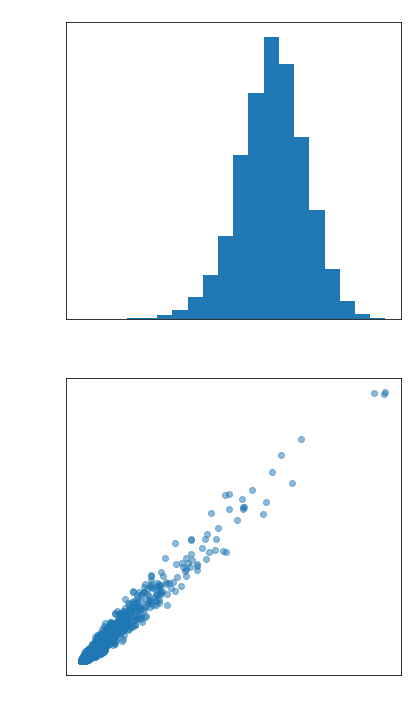

In [41]:
#Slide 3 - A look at different metrics

#Start with Ratings Histogram
fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(2, 1, 1)
plt.hist(games['Rating Average'], bins=20)
plt.title('Distribution of User Ratings')
plt.ylabel('# of Ratings')
plt.xlabel('Score Given')


#Let's get a scatterplot of #Rankings and #Owners
ax = fig.add_subplot(2, 1, 2)
plt.scatter(games['Owned Users'], games['Users Rated'], alpha=0.5)
plt.title('Comparison of Owners and Raters for Each Game')
plt.ylabel('# Ratings')
plt.xlabel('# Owners')
plt.savefig('Success Metrics.png')
plt.plot()

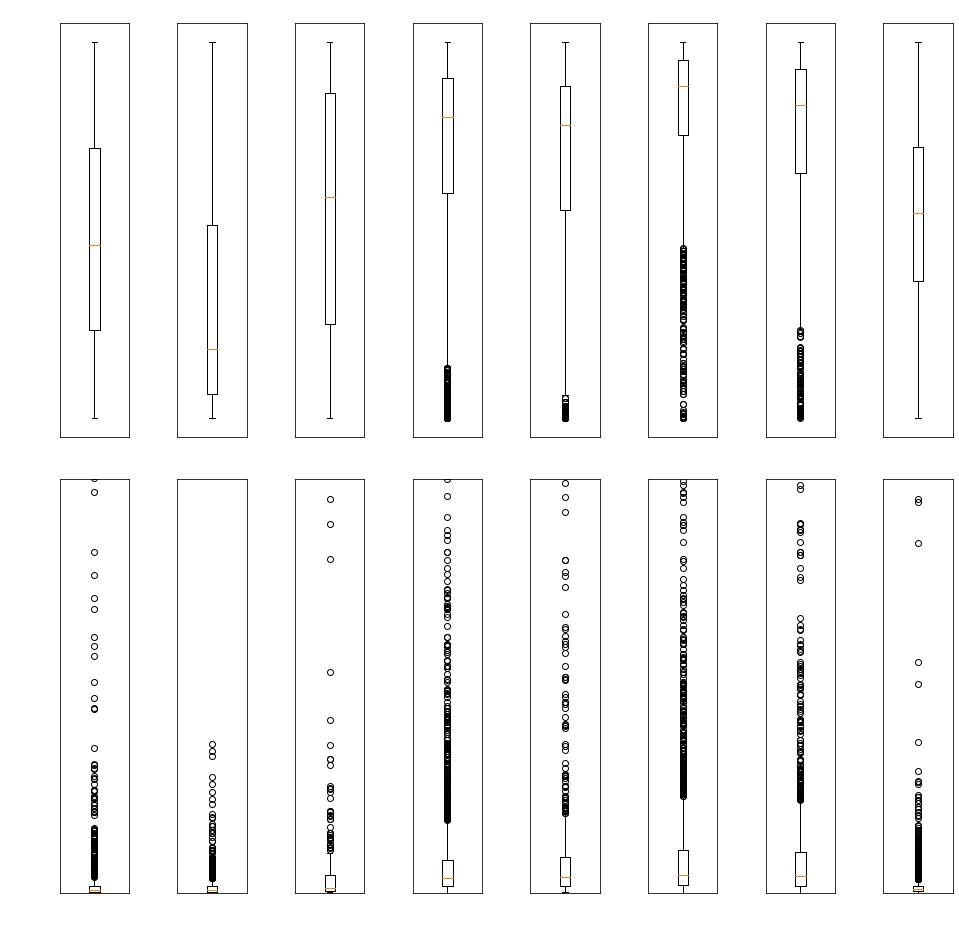

In [42]:
#Slide 4 - Domain's effect on Ranking/Ownership
fig = plt.figure(figsize=(16, 16))
for x in range(len(domains)):
    ax = fig.add_subplot(2, 8, x+1)
    plt.boxplot(games[games[domains[x]]==1]['BGG Rank'])
    ax.invert_yaxis()
    ax.set_title(domains[x], color='white')
    if x == 0:
        ax.set_ylabel('BGG Rank', color='white')
    ax = fig.add_subplot(2, 8, x+9)
    plt.boxplot(games[games[domains[x]]==1]['Owned Users'])
    plt.ylim(0, 40000)
    ax.set_xlabel(domains[x], color='white')
    if x==0:
        ax.set_ylabel('Owners', color='white')
plt.subplots_adjust(wspace=0.7, hspace=0.1)
plt.savefig('Domain Overview Final.png')
plt.show()        

In [43]:
#Supporting data for Slide 5

print(games[games['Strategy Games']==1]['BGG Rank'].quantile(0.75))
for domain in domains:
    temp = games[games[domain]==1]['BGG Rank'].median()
    temp = temp.astype('int')
    if temp <= 5031:
        print(domain)
    print(temp)

5031.0
10986
16719
8388
Family Games
4053
Party Games
4587
Strategy Games
2387
Thematic Games
3406
9214


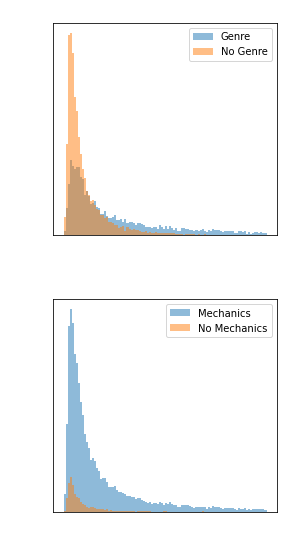

In [44]:
#Graph for Slide 6

fig = plt.figure(figsize=(4, 9))
ax = fig.add_subplot(2, 1, 1)
plt.hist(game_df[game_df['Domains'].notnull() == True]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='Genre')
plt.hist(game_df[game_df['Domains'].isnull() == True]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='No Genre')
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('black')
plt.xlabel('Owners')
plt.ylabel('# of Games')
plt.title('Given Genres by Ownership')

ax=fig.add_subplot(2, 1, 2)
plt.hist(game_df[game_df['Mechanics'].isnull() == False]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='Mechanics')
plt.hist(game_df[game_df['Mechanics'].isnull() == True]['Owned Users'], bins=100, range=(0, 3000), alpha=0.5, label='No Mechanics')
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('black')
plt.title('Given Mechanics by Ownership')
plt.xlabel('Owners')
plt.ylabel('# of Games')
plt.subplots_adjust(hspace=0.3)
plt.savefig('Null Graphs.png')
plt.show()

In [45]:
#Supporting Data for Slide 6

print(len(games))
print(len(games[games['Domains']==0]))
print(len(games[games['Mechanics']==0]))
print(10136/20320)
print(1581/20320)

20320
10136
1581
0.4988188976377953
0.07780511811023622


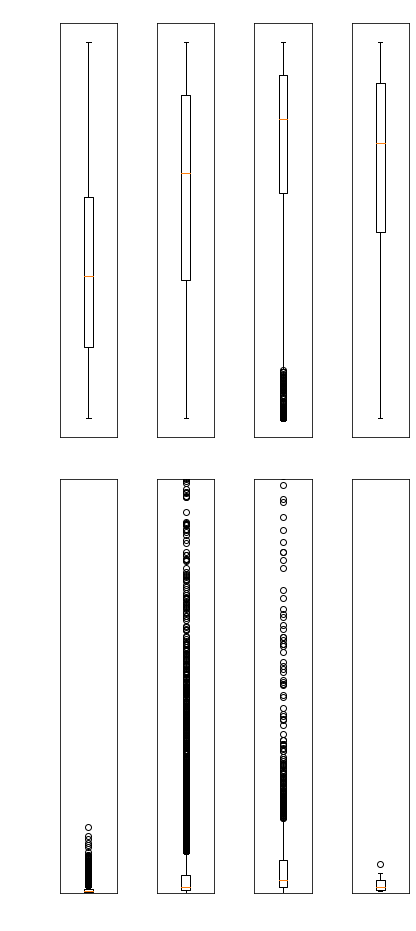

In [46]:
#Graph for Slide 7

fig = plt.figure(figsize=(8, 16))
for x in range(4):
    ax = fig.add_subplot(2, 5, x+1)
    plt.boxplot(games[games['Domains']==x]['BGG Rank'])
    ax.invert_yaxis()
    plt.title(x)
    if x == 0:
        plt.ylabel('BGG Rank')
    ax = fig.add_subplot(2, 5, x+6)
    plt.boxplot(games[games['Domains']==x]['Owned Users'])
    plt.ylim(0, 40000)
    plt.xlabel(x)
    if x==0:
        plt.ylabel('Owners')
plt.subplots_adjust(wspace=0.7, hspace=0.1)
plt.savefig('Shared Domains.png')
plt.show()        

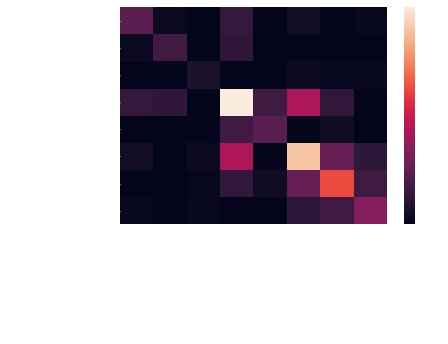

In [47]:
#Graph for Slide 8

sns.heatmap(heat_d).get_figure().savefig('Two Domain Heatmap.png', bbox_inches='tight')

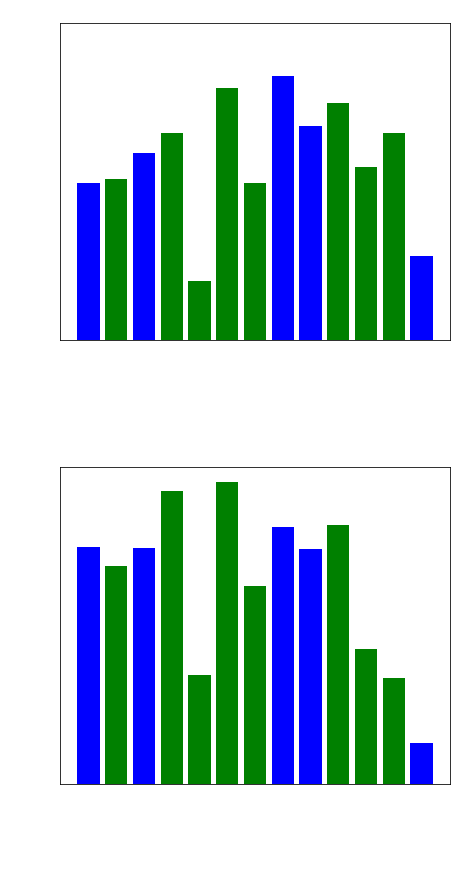

In [130]:
#Graph for Slide 9

#make function to make setup for me
nine_order = ['Party Solo', 'Party/Family Mix', 'Family Solo', 'Family/Abstract Mix', 'Family/Children\'s Mix', 'Family/Strategy Mix', 'Family/Thematic Mix', 'Strategy Solo', 'Thematic Solo', 'Strategy/Thematic Mix', 'Strategy/Wargame Mix', 'Thematic/Wargame Mix', 'Wargames Solo']
family_order = ['Abstract Games', 'Children\'s Games', 'Strategy Games', 'Thematic Games']
strategy_order = ['Thematic Games', 'Wargames']
colours = ['blue', 'green', 'blue', 'green', 'green', 'green', 'green', 'blue', 'blue', 'green', 'green', 'green', 'blue']
def slide_nine_bars(metric):
    bars = []
    bars.append(games[games['Party Games']==1][metric].mean())
    bars.append(games[(games['Party Games']==1)&(games['Family Games']==1)][metric].mean())
    bars.append(games[games['Family Games']==1][metric].mean())
    for domain in family_order:
        bars.append(games[(games['Family Games']==1)&(games[domain]==1)][metric].mean())
    bars.append(games[games['Strategy Games']==1][metric].mean())
    bars.append(games[games['Thematic Games']==1][metric].mean())
    for domain in strategy_order:
        bars.append(games[(games['Strategy Games']==1)&(games[domain]==1)][metric].mean())
    bars.append(games[(games['Thematic Games']==1)&(games['Wargames']==1)][metric].mean())
    bars.append(games[games['Wargames']==1][metric].mean())
    true_bars = [12000-x for x in bars]
    return bars, true_bars

#Make graphs here
fig = plt.figure(figsize=(7, 14))
ax = fig.add_subplot(2, 1, 1)
rank_bottoms, rank_bars = slide_nine_bars('BGG Rank')
plt.bar(range(len(rank_bars)), rank_bars, bottom = rank_bottoms, color = colours)
plt.title('Ranking of Games by Genres')
plt.ylabel('Average Ranking of Games')
plt.xlabel('Genres')
ax.set_ylim(2000, 12000)
ax.invert_yaxis()
ax.set_xticks(range(len(rank_bars)))
ax.set_xticklabels(nine_order, rotation=30, ha='right')

ax = fig.add_subplot(2, 1, 2)
rank_bottom, rank_bars = slide_nine_bars('Owned Users')
plt.bar(range(len(rank_bottom)), rank_bottom, color=colours)
plt.title('Ownership Numbers by Generes')
plt.ylabel('Owned Users')
plt.xlabel('Genres')
ax.set_xticks(range(len(rank_bars)))
ax.set_xticklabels(nine_order, rotation=30, ha='right')
plt.subplots_adjust(hspace=0.4)
plt.savefig('Mixed Genres Outcomes.png')
plt.show()


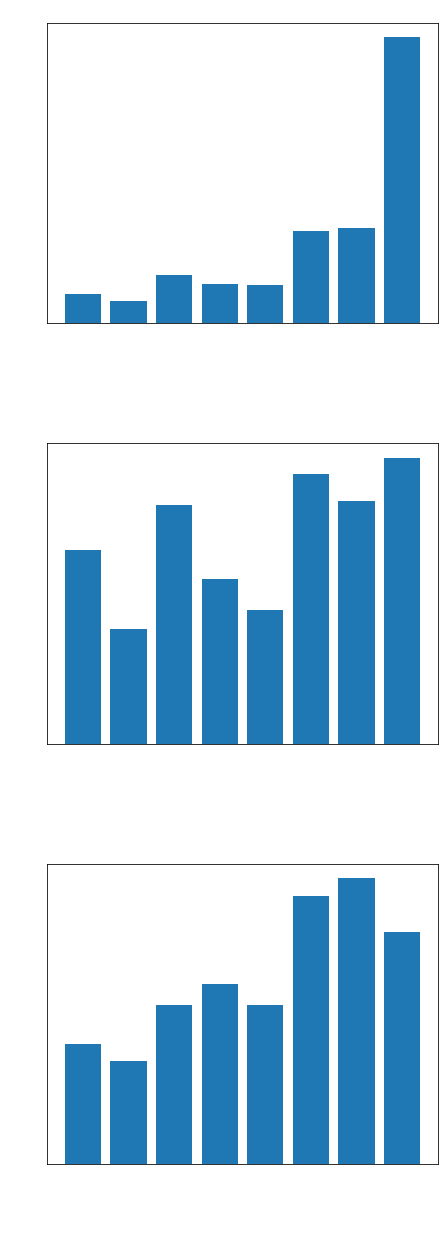

In [49]:
#Graph for Slide 10

#Triple pronged bar graph for complexity, playtime and number of mechanics on average for core domains
fig=plt.figure(figsize=(7, 21))
ax = fig.add_subplot(3, 1, 1)
bars = [games[games[domain]==1]['Play Time'].mean() for domain in domains]
plt.bar(range(len(bars)), bars)
plt.title('Mean Play Time by Genre')
plt.ylabel('Playtime (minutes)')
plt.xlabel('Genres')
ax.set_xticks(range(len(bars)))
ax.set_xticklabels(domains, rotation='30', ha='right')

ax=fig.add_subplot(3, 1, 2)
bars=[games[games[domain]==1]['Complexity Average'].mean() for domain in domains]
plt.bar(range(len(bars)), bars)
plt.title('Mean Complexity by Genre')
plt.ylabel('Complexity')
plt.xlabel('Genre')
ax.set_xticks(range(len(domains)))
ax.set_xticklabels(domains, rotation=30, ha='right')

ax=fig.add_subplot(3, 1, 3)
bars=[games[games[domain]==1]['Mechanics'].mean() for domain in domains]
plt.bar(range(len(bars)), bars)
plt.title('Mean Mechanics by Genre')
plt.ylabel('Mechanics Used per Game')
plt.xlabel('Genre')
ax.set_xticks(range(len(domains)))
ax.set_xticklabels(domains, rotation=30, ha='right')

plt.subplots_adjust(hspace=0.4)
plt.savefig('Play Complex Mechanics.png')
plt.show()

In [50]:
changelist_1 = mechanics_df[mechanics_df['100%']<10]['Mechanic'].tolist()
changelist_2 = mechanics_df[mechanics_df['Rank 1%']<10]['Mechanic'].tolist()
changelist_3 = mechanics_df[mechanics_df['Owned 1%']<10]['Mechanic'].tolist()

keeplist_1 = mechanics_df[mechanics_df['100%']>=10]['Mechanic'].tolist()
keeplist_2 = mechanics_df[mechanics_df['Rank 1%']>=10]['Mechanic'].tolist()
keeplist_3 = mechanics_df[mechanics_df['Owned 1%']>=10]['Mechanic'].tolist()

valuelist_1 = mechanics_df[mechanics_df['100%']>=10]['100%'].tolist()
keeplist_1.append('Other')
valuelist_1.append(mechanics_df[mechanics_df['Mechanic'].isin(changelist_1)==True]['100%'].sum())
pie_tuples_1 = list(zip(keeplist_1, valuelist_1))
pie_df_1 = pd.DataFrame(pie_tuples_1, columns=(['Mechanic', '100%']))
pie_df_1.sort_values(by=['100%'], ascending=False, inplace=True)
print(pie_df_1)

valuelist_2 = mechanics_df[mechanics_df['Rank 1%']>=10]['Rank 1%'].tolist()
keeplist_2.append('Other')
valuelist_2.append(mechanics_df[mechanics_df['Mechanic'].isin(changelist_2)==True]['Rank 1%'].sum())
pie_tuples_2 = list(zip(keeplist_2, valuelist_2))
pie_df_2 = pd.DataFrame(pie_tuples_2, columns=(['Mechanic', 'Rank 1%']))
pie_df_2.sort_values(by=['Rank 1%'], ascending=False, inplace=True)
print(pie_df_2)

valuelist_3 = mechanics_df[mechanics_df['Owned 1%']>=10]['Owned 1%'].tolist()
keeplist_3.append('Other')
valuelist_3.append(mechanics_df[mechanics_df['Mechanic'].isin(changelist_3)==True]['Owned 1%'].sum())
pie_tuples_3 = list(zip(keeplist_3, valuelist_3))
pie_df_3 = pd.DataFrame(pie_tuples_3, columns=(['Mechanic', 'Owned 1%']))
pie_df_3.sort_values(by=['Owned 1%'], ascending=False, inplace=True)
print(pie_df_3)

bar1 = []
bar2 = []
targets = [('100%', keeplist_1), ('Rank 1%', keeplist_2), ('Owned 1%', keeplist_3)]
labels = ['Total', 'Top Ranked', 'Most Owned']
for target, items in targets:
    bar1.append(mechanics_df[mechanics_df[target]>=10][target].sum())
    bar2.append(mechanics_df[mechanics_df[target]<10][target].sum())

                 Mechanic    100%
5                   Other  193.82
0            Dice Rolling   27.91
1         Hand Management   20.42
3          Set Collection   13.44
4  Variable Player Powers   12.47
2            Hexagon Grid   11.08
                         Mechanic  Rank 1%
21                          Other   330.61
9                 Hand Management    41.87
18         Variable Player Powers    36.95
6                    Dice Rolling    30.05
3                   Card Drafting    29.06
16          Solo / Solitaire Game    27.59
14                 Set Collection    27.59
20               Worker Placement    22.66
4                Cooperative Game    18.23
12                  Modular Board    17.73
1       Area Majority / Influence    17.24
7                End Game Bonuses    16.26
17                 Tile Placement    15.27
19                Variable Set-up    13.79
5      Deck Bag and Pool Building    13.30
0                   Action Points    12.81
13     Network and Route Buildi

279.14
737.0200000000002
657.71


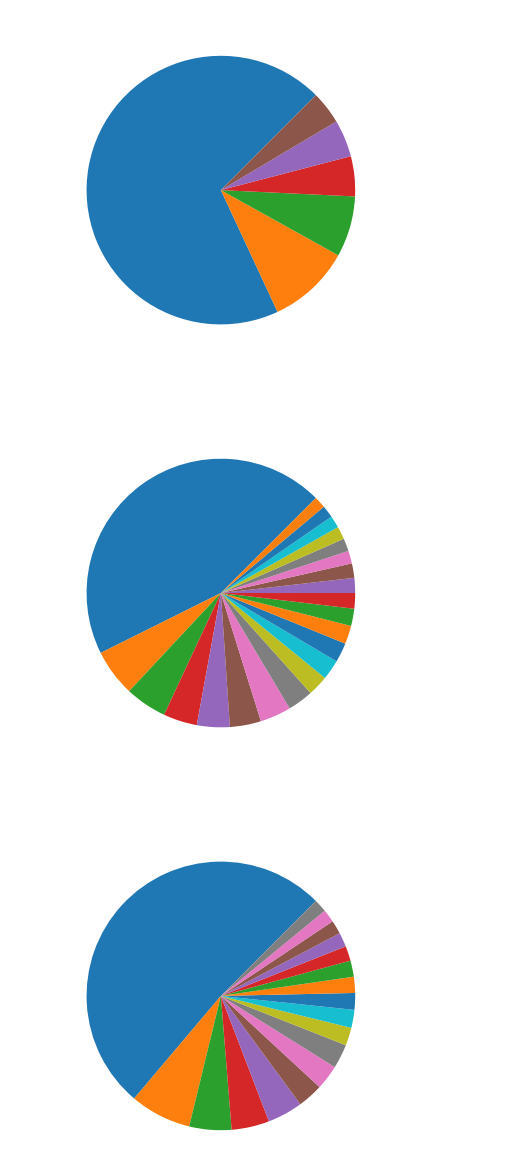

In [51]:
#Graph for Slide 11

#Pie chart, 17 mechanics over 5% can have their own, rest can have other.

fig = plt.figure(figsize=(7,21))
ax=fig.add_subplot(3, 1, 1)
plt.pie(pie_df_1['100%'], normalize=True, labels=pie_df_1['Mechanic'], startangle=45)
plt.title('Mechanics in over 5% of all games')
pie_1 = pie_df_1
print(pie_df_1['100%'].sum())

ax=fig.add_subplot(3,1,2)
plt.pie(pie_df_2['Rank 1%'], normalize=True, labels=pie_df_2['Mechanic'], startangle=45)
plt.title('Mechanics in over 5% of top ranked games')
pie_2 = pie_df_2

print(pie_df_2['Rank 1%'].sum())
print(pie_df_3['Owned 1%'].sum())

ax=fig.add_subplot(3,1,3)
plt.pie(pie_df_3['Owned 1%'], normalize=True, labels=pie_df_3['Mechanic'], startangle=45)
plt.title('Mechanics in over 5% of most owned games')
plt.savefig('Mech Pie.png')
plt.show()


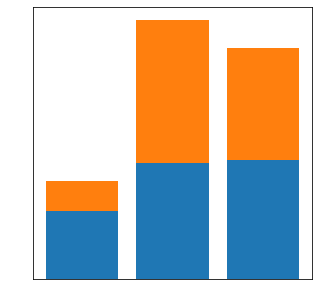

In [52]:
#Curious about how the numbers look for total percentage comapred to those with at least 5%

bar1 = []
bar2 = []
targets = ['100%', 'Rank 1%', 'Owned 1%']
labels = ['Total', 'Top Ranked', 'Most Owned']
for target in targets:
    bar1.append(mechanics_df[mechanics_df[target]>=10][target].sum())
    bar2.append(mechanics_df[mechanics_df[target]<10][target].sum())
    
fig = plt.figure(figsize=(5,5))
ax=plt.subplot()
plt.bar(range(len(bar2)), bar2)
plt.bar(range(len(bar1)), bar1, bottom=bar2)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.show()

In [53]:
shared = pie_df_1[(pie_df_1['Mechanic'].isin(pie_df_2['Mechanic'])==True)&(pie_df_1['Mechanic'].isin(pie_df_3['Mechanic'])==True)&(pie_df_1['Mechanic']!='Other')]['Mechanic'].to_list()
#shared = pie_1[pie_1['Mechanic']!='Other']['Mechanic'].to_list()
shared_df = mechanics_df[mechanics_df['Mechanic'].isin(shared)==True][['Mechanic', '100%', 'Rank 1%', 'Owned 1%']].reset_index(drop=True)
shared_df.sort_values(by=['100%'], ascending=False, inplace=True)
shared_df.reset_index(drop=True, inplace=True)
print(shared_df, '\n')

print(len(keeplist_1))
print(len(keeplist_2))
print(len(keeplist_3))

                 Mechanic   100%  Rank 1%  Owned 1%
0            Dice Rolling  27.91    30.05     29.90
1         Hand Management  20.42    41.87     48.53
2          Set Collection  13.44    27.59     27.94
3  Variable Player Powers  12.47    36.95     33.33 

6
22
18


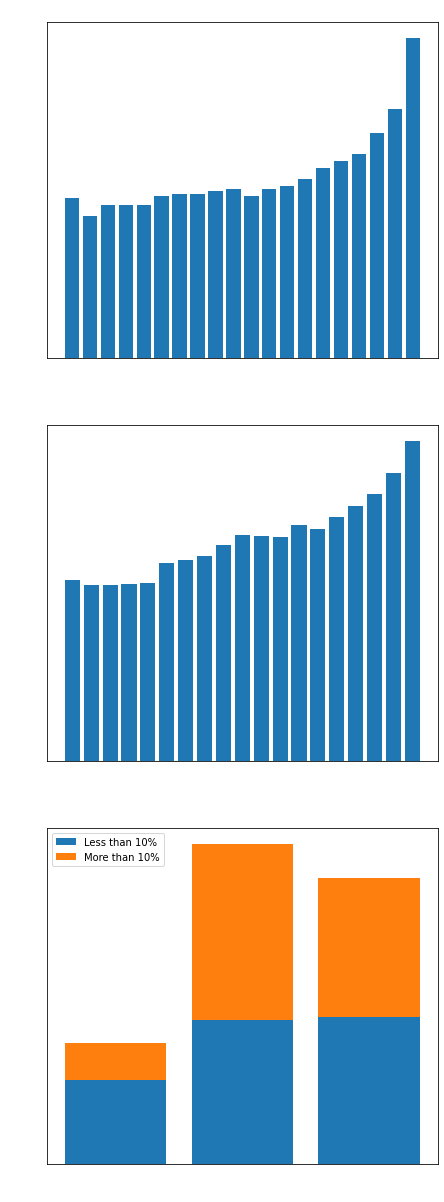

In [108]:
#Graph for Slide 12

#Show how more owned and better ranked games ahve more mechanics.
#Rework the stuff below to focus on charts 2, 4.

quantiles = [x/100 for x in range(0, 101, 5)]
mech_y = []

for x in range(len(quantiles)-1):
    threshold_one = games['Owned Users'].quantile(quantiles[x]).round(0)
    threshold_one = threshold_one.astype('int')
    threshold_two = games['Owned Users'].quantile(quantiles[x+1]).round(0)
    threshold_two = threshold_two.astype('int')
    mech_y.append(games[(games['Mechanics']>0)&(games['Owned Users']>=threshold_one)&(games['Owned Users']<threshold_two)]['Mechanics'].mean())

fig=plt.figure(figsize=(7, 21))
ax = fig.add_subplot(3, 1, 1)
plt.bar(range(len(quantiles)-1), mech_y)
ax.set_xticks(range(len(quantiles)-1))
ax.set_xticklabels(quantiles[1:])
plt.title('Number of Mechanics in Popular Games')
plt.xlabel('Ownership Percentile')
plt.ylabel('Average Number of Mechanics')

quantiles = [x/100 for x in range(100, 0, -5)]
mech_y = []

for x in range(len(quantiles)-1):
    threshold_one = games['BGG Rank'].quantile(quantiles[x]).round(0)
    threshold_one = threshold_one.astype('int')
    threshold_two = games['BGG Rank'].quantile(quantiles[x+1]).round(0)
    threshold_two = threshold_two.astype('int')
    mech_y.append(games[(games['Mechanics']>0)&(games['BGG Rank']<=threshold_one)&(games['BGG Rank']>threshold_two)]['Mechanics'].mean())

ax = fig.add_subplot(3, 1, 2)
plt.bar(range(len(quantiles)-1), mech_y)
ax.set_xticks(range(len(quantiles)-1))
ax.set_xticklabels(quantiles[1:])
plt.title('Number of Mechanics in Top Ranked Games')
plt.xlabel('Ranked Percentile')
plt.ylabel('Average Number of Mechanics')



#Add this in for completmetary totals.
labels = ['Total', 'Top Ranked', 'Most Owned']
legend = ['Less than 10%', 'More than 10%']
ax = fig.add_subplot(3, 1, 3)
plt.bar(range(len(bar2)), bar2)
plt.bar(range(len(bar1)), bar1, bottom=bar2)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('Total Percentage of Games each Mechanic is in')
plt.ylabel('Combined Percentage')
plt.xlabel('Subset of Games')
l = plt.legend(legend, loc=2)
for text in l.get_texts():
    text.set_color('black')
plt.savefig('Mechanics Distribution.png')
plt.show()


In [55]:
#Additional data for slide 12

for target in targets:
    print(target, mechanics_df[target].sum())

100% 279.14
Rank 1% 737.02
Owned 1% 657.71


In [61]:
#Setup for Slide 13+
games['Mechanics'] = games[list(mechanics)].sum(axis=1)


total=[]
rank=[]
owned=[]
complexity=[]
play_time=[]
domain=[]
mech=[]

for mechanic in mechanics:
    total.append(len(games[games[mechanic]==1]))
    rank.append(games[games[mechanic]==1]['BGG Rank'].mean().round(2))
    owned.append(games[games[mechanic]==1]['Owned Users'].mean().round(2))
    complexity.append(games[games[mechanic]==1]['Complexity Average'].mean().round(2))
    play_time.append(games[games[mechanic]==1]['Play Time'].mean().round(2))
    domain.append(games[games[mechanic]==1]['Domains'].mean().round(2))
    mech.append(games[games[mechanic]==1]['Mechanics'].mean().round(2))

mech_tuples=list(zip(mechanics, total, rank, owned, domain, mech, complexity, play_time))
core_mechanics_df = pd.DataFrame(mech_tuples, columns=['Mechanic', 'Total', 'BGG Rank', 'Owned Users', 'Domains', 'Mechanics', 'Complexity Average', 'Play Time'])
print(core_mechanics_df)


                               Mechanic  Total  BGG Rank  Owned Users  Domains  Mechanics  Complexity Average  Play Time
0                                Acting    230  11853.56       919.10     0.37       3.20                1.25      50.05
1                       Action Drafting     26   2001.23     14152.77     0.92       7.46                2.98     108.08
2                         Action Points   1082   7330.46      2270.82     0.72       4.92                2.52     100.67
3                          Action Queue    397   7712.57      2122.93     0.58       4.98                2.39      74.52
4                      Action Retrieval     50   2100.52      8053.88     1.12       6.66                2.55      74.40
..                                  ...    ...       ...          ...      ...        ...                 ...        ...
177        Victory Points as a Resource     52   3067.15      9302.88     0.85       7.56                2.92     122.69
178                             

In [88]:
#Data for Slide 13
core_ranked = core_mechanics_df[(core_mechanics_df['Total']>200)&(core_mechanics_df['BGG Rank']<8452)]['Mechanic'].tolist()
core_owned = core_mechanics_df[(core_mechanics_df['Total']>200)&(core_mechanics_df['Owned Users']>2290)]['Mechanic'].tolist()
#core_ranked = core_mechanics_df[core_mechanics_df['BGG Rank']<8452]['Mechanic'].tolist()
#core_owned = core_mechanics_df[core_mechanics_df['Owned Users']>2290]['Mechanic'].tolist()
both = []
ranked = []
owned = []
neither = []
for mechanic in mechanics:
    if (mechanic in core_ranked) and (mechanic in core_owned):
        both.append(mechanic)
    if (mechanic in core_ranked) and (mechanic not in core_owned):
        ranked.append(mechanic)
    if (mechanic not in core_ranked) and (mechanic in core_owned):
        owned.append(mechanic)
    else:
        neither.append(mechanic)

print(both)



['Area Majority / Influence', 'Card Drafting', 'Cooperative Game', 'Deck Bag and Pool Building', 'Events', 'Network and Route Building', 'Role Playing', 'Scenario / Mission / Campaign Game', 'Solo / Solitaire Game', 'Variable Phase Order', 'Variable Player Powers', 'Variable Set-up', 'Worker Placement']


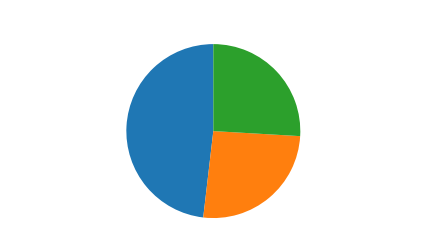

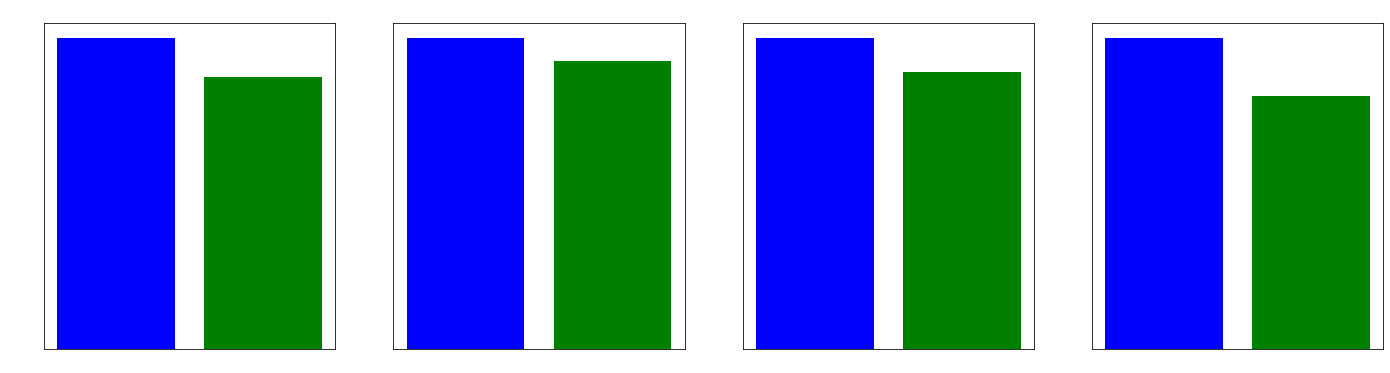

In [92]:
#Graph for Slide 13

labels = ['Both', 'Ranked', 'Owned']
values=[len(both), len(ranked), len(owned)]
plt.pie(values, labels=labels, normalize=True, startangle=90)
plt.title('Distribution of Mechanics in Most Owned and Top Ranked Mechanics')
plt.savefig('Top Distribution')
plt.show()

#core_ranked = core_mechanics_df[(core_mechanics_df['Total']>200)&(core_mechanics_df['BGG Rank']<8452)]['Mechanic'].tolist()
#core_owned = core_mechanics_df[(core_mechanics_df['Total']>200)&(core_mechanics_df['Owned Users']>2290)]['Mechanic'].tolist()

metrics = ['Domains', 'Mechanics', 'Complexity Average', 'Play Time']
labels = ['Top Ranked', 'Most Owned']
colours = ['blue', 'green']
ys = ['Average # Domains per game', 'Average # Mechanics per game', 'Average Complexity Rating per game', 'Average Play Time per game']

fig=plt.figure(figsize=(24, 6))
for x in range(len(metrics)):
    ax = fig.add_subplot(1, 4, x+1)
    bars = [core_mechanics_df[core_mechanics_df['Mechanic'].isin(core_ranked)==True][metrics[x]].mean(), core_mechanics_df[core_mechanics_df['Mechanic'].isin(core_owned)==True][metrics[x]].mean()]
    plt.bar(range(len(bars)), bars, color=colours)
    plt.title(metrics[x])
    plt.ylabel(ys[x])
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
plt.savefig('Top Metrics Exploration')
plt.show()
    

In [131]:
#Prep Data for Slide 14

core_domains = [('Family', family_core), ('Party', party_core), ('Strategy', strategy_core), ('Thematic', thematic_core)]


for label, domain in core_domains:
    print(label)
    print(domain.index.values)
    print(len(domain))

print()
for label, domain in core_domains:    
    print(label)
    print(domain[domain.index.isin(core_ranked)==True].index.values)
    print(len(domain[domain.index.isin(core_ranked)==True].index.values))
    print(domain[domain.index.isin(core_owned)==True].index.values)
    print(len(domain[domain.index.isin(core_owned)==True].index.values))
    print()


Family
['Area Majority / Influence' 'Card Drafting' 'Hand Management'
 'Modular Board' 'Pattern Building' 'Push Your Luck' 'Set Collection'
 'Simultaneous Action Selection' 'Take That' 'Tile Placement']
10
Party
['Acting' 'Player Elimination' 'Team-Based Game' 'Voting']
4
Strategy
['Action Points' 'Area Majority / Influence' 'Area Movement'
 'Auction/Bidding' 'Card Drafting' 'Deck Bag and Pool Building'
 'Grid Movement' 'Hand Management' 'Modular Board'
 'Network and Route Building' 'Point to Point Movement' 'Set Collection'
 'Simultaneous Action Selection' 'Solo / Solitaire Game' 'Take That'
 'Tile Placement' 'Trading' 'Variable Player Powers' 'Worker Placement']
19
Thematic
['Action Points' 'Area Movement' 'Cooperative Game'
 'Deck Bag and Pool Building' 'Dice Rolling' 'Grid Movement'
 'Modular Board' 'Player Elimination' 'Role Playing'
 'Scenario / Mission / Campaign Game' 'Solo / Solitaire Game'
 'Storytelling' 'Team-Based Game' 'Variable Player Powers']
14

Family
['Area Majority 

[]

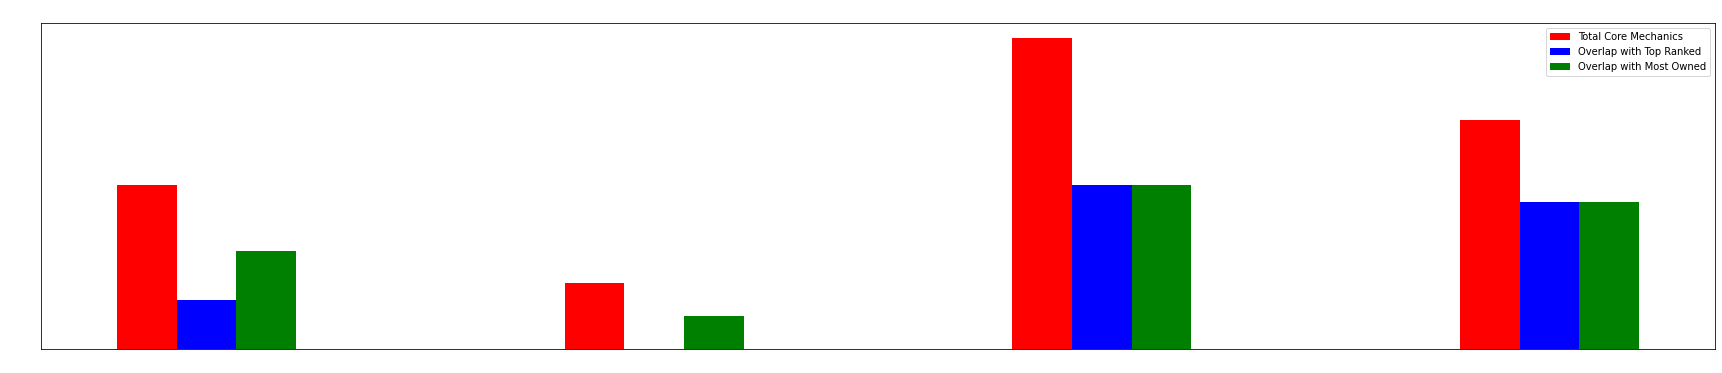

In [132]:
#Graph for Slide 14

#borrowed code for list comprehension for multiple bars
#temp_x = [5*element + 0.4*n for element in range(len(statuses))]
bar_width = 0.4
c_bars = [3*element + bar_width*1 for element in range(len(core_domains))]
r_bars = [3*element + bar_width*2 for element in range(len(core_domains))]
o_bars = [3*element + bar_width*3 for element in range(len(core_domains))]

c_values = []
r_values = []
o_values = []
labels = []

legend = ('Total Core Mechanics', 'Overlap with Top Ranked', 'Overlap with Most Owned')
fig = plt.figure(figsize=(30, 6))
ax = fig.add_subplot()
for label, domain in core_domains:
    c_values.append(len(domain))
    r_values.append(len(domain[domain.index.isin(core_ranked)==True]))
    o_values.append(len(domain[domain.index.isin(core_owned)==True]))
    labels.append(label)
plt.bar(c_bars, c_values, width=bar_width, color='red')
plt.bar(r_bars, r_values, width=bar_width, color='blue')
plt.bar(o_bars, o_values, width=bar_width, color='green')
plt.title('Core Mechanics and Overlap with most Successful Mechanics')
plt.ylabel('# Mechanics')
ax.set_xticks(r_bars)
ax.set_xticklabels(labels)
ax.set_yticks(range(0, 21, 2))
l = plt.legend(legend)
for text in l.get_texts():
    text.set_color('black')
plt.savefig('Core Mechanics Overview by Genre.png')
plt.plot()

In [147]:
#setup for domain slides

total=[]
rank=[]
owned=[]
complexity=[]
play_time=[]
genre=[]
mech=[]

for domain in domains:
    total.append(len(games[games[domain]==1]))
    rank.append(games[games[domain]==1]['BGG Rank'].mean().round(2))
    owned.append(games[games[domain]==1]['Owned Users'].mean().round(2))
    complexity.append(games[games[domain]==1]['Complexity Average'].mean().round(2))
    play_time.append(games[games[domain]==1]['Play Time'].mean().round(2))
    genre.append(games[games[domain]==1]['Domains'].mean().round(2))
    mech.append(games[games[domain]==1]['Mechanics'].mean().round(2))

domain_tuples=list(zip(domains, total, rank, owned, genre, mech, complexity, play_time))
domains_df = pd.DataFrame(domain_tuples, columns=['Domain', 'Total', 'BGG Rank', 'Owned Users', 'Domains', 'Mechanics', 'Complexity Average', 'Play Time'])
print(domains_df)
genre_order = ['Total', 'BGG Rank', 'Owned Users', 'Domains', 'Mechanics', 'Complexity Average', 'Play Time']
genre_bars = []
genre_bars.append(domains_df['Total'].max())
genre_bars.append(20000 - domains_df['BGG Rank'].min())
genre_bars.append(domains_df['Owned Users'].max())
genre_bars.append(domains_df['Domains'].max())
genre_bars.append(domains_df['Mechanics'].max())
genre_bars.append(domains_df['Complexity Average'].max())
genre_bars.append(domains_df['Play Time'].max())
base_bars = [genre_bars[x]/genre_bars[x] for x in range(len(genre_bars))]

               Domain  Total  BGG Rank  Owned Users  Domains  Mechanics  Complexity Average  Play Time
0      Abstract Games   1070  10651.96      1350.91     1.19       1.87                1.95      30.01
1    Children's Games    849  14450.08       724.18     1.17       1.61                1.16      22.92
2  Customizable Games    297   9101.63      2240.55     1.21       2.48                2.40      49.18
3        Family Games   2173   6085.80      4071.73     1.39       2.80                1.66      40.29
4         Party Games    605   7037.41      4089.07     1.33       2.47                1.35      38.46
5      Strategy Games   2205   3657.13      4438.45     1.34       4.17                2.71      93.28
6      Thematic Games   1174   5232.72      4045.53     1.46       4.44                2.44      96.83
7            Wargames   3316   9359.80       705.58     1.09       3.61                2.87     289.66


In [214]:
#Family Slide
family_ranked = family_core[family_core.index.isin(core_ranked)==True].index.values.tolist()
family_owned = family_core[family_core.index.isin(core_owned)==True].index.values.tolist()
print(family_core)
print()
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(family_ranked)==True])
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(family_owned)==True])
print()
genre_ranked = core_mechanics_df[(core_mechanics_df['Mechanic'].isin(family_ranked)==True)|(core_mechanics_df['Mechanic'].isin(family_owned)==True)]['Mechanic'].tolist()
for mechanic in genre_ranked:
    print(mechanic, (core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['BGG Rank'].max()-family_core.loc[mechanic]['Ave. Rank']).round(2), (family_core.loc[mechanic]['Ave Owners']-core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['Owned Users'].max()).round(2))
print()
for column in genre_order:
    temp_df = domains_df.sort_values(by=column, ascending=False).reset_index(drop=True)
    print(temp_df[temp_df['Domain']=='Family Games'][column])

                               Total   Domain %     Mech %     Ratio    Ave. Rank   Rank Diff.   Ave Owners  Owners Diff.  Ave Complexity  Complexity Diff.  Ave Play Time  Play Time Diff.  Ave Domains  Domain Diff.  Ave Mechanics  Mechanics Diff.
Area Majority / Influence      152.0   6.994938  10.119840  1.446738  4336.098684  1749.697450  4590.953947    519.224081        1.928092          0.269353      45.638158         5.344555     1.532895      0.147253       3.644737         0.845381
Card Drafting                  276.0  12.701335  15.953757  1.256069  3466.358696  2619.437439  7936.137681   3864.407815        1.803043          0.144304      41.528986         1.235382     1.344203     -0.041439       4.003623         1.204267
Hand Management                675.0  31.063046  16.268980  0.523741  5087.082963   998.713171  5356.139259   1284.409393        1.695511          0.036772      39.494815        -0.798788     1.362963     -0.022679       3.318519         0.519163
Modular Boar

[0.655307599517491, 0.8513926868414178, 0.9173765616375086, 0.9520547945205479, 0.6306306306306305, 0.5783972125435539, 0.1390941103362563]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.994937873907041, 12.701334560515416, 31.0630464795214, 8.651633686148182, 6.166589967786471, 8.053382420616659, 29.728485964104923, 7.225034514496088, 5.476300046019328, 12.42521859180856, 151.449608835711]


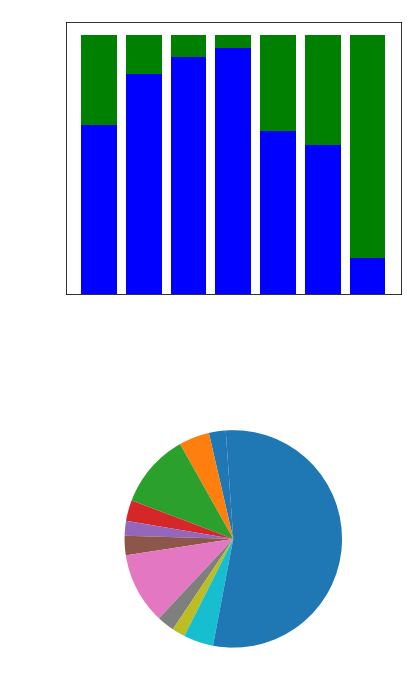

In [191]:
#Family Core Graph
family_bars = [domains_df[domains_df['Domain']=='Family Games'][genre_order[x]].max().tolist() for x in range(len(genre_order))]
family_bars[1]=(20000-family_bars[1])
family_bars = [family_bars[x]/genre_bars[x] for x in range(len(genre_order))]
print(family_bars)
print(base_bars)
fig=plt.figure(figsize=(6, 12))
ax = fig.add_subplot(2, 1, 1)
plt.bar(range(len(base_bars)), base_bars, color='green')
plt.bar(range(len(family_bars)), family_bars, color='blue')
ax.set_xticks(range(len(genre_order)))
ax.set_xticklabels(genre_order, rotation=30, ha='right')
plt.title('Genre Metrics compared to Genres as a whole')
plt.ylabel('Percentage of Best Genre')


core_list = family_core.index.values.tolist()
core_list.append('Other')
core_values = family_df[family_df.index.isin(core_list)]['Domain %'].tolist()
core_values.append(family_df[~family_df.index.isin(core_list)]['Domain %'].sum())
print(core_values)

ax = fig.add_subplot(2, 1, 2)
plt.pie(core_values, labels=core_list, normalize=True, startangle=94)
plt.title('Makeup of Genre by Core Mechanics')
plt.subplots_adjust(hspace=0.4)
plt.savefig('Family Overview.png')
plt.show()

In [213]:
#Party Slide
party_ranked = party_core[party_core.index.isin(core_ranked)==True].index.values.tolist()
party_owned = party_core[party_core.index.isin(core_owned)==True].index.values.tolist()
print(party_core)
print()
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(party_ranked)==True])
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(party_owned)==True])
print()
genre_ranked = core_mechanics_df[(core_mechanics_df['Mechanic'].isin(party_ranked)==True)|(core_mechanics_df['Mechanic'].isin(party_owned)==True)]['Mechanic'].tolist()
for mechanic in genre_ranked:
    print(mechanic, (core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['BGG Rank'].max()-party_core.loc[mechanic]['Ave. Rank']).round(2), (party_core.loc[mechanic]['Ave Owners']-core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['Owned Users'].max()).round(2))
print()
for column in genre_order:
    temp_df = domains_df.sort_values(by=column, ascending=False).reset_index(drop=True)
    print(temp_df[temp_df['Domain']=='Party Games'][column])

                    Total   Domain %     Mech %     Ratio    Ave. Rank   Rank Diff.   Ave Owners  Owners Diff.  Ave Complexity  Complexity Diff.  Ave Play Time  Play Time Diff.  Ave Domains  Domain Diff.  Ave Mechanics  Mechanics Diff.
Acting               62.0  10.247934  26.956522  2.630435  6868.693548   168.714716  2549.177419  -1539.888696        1.330000         -0.016545      71.290323        32.834124     1.096774     -0.232151       3.596774         1.125700
Player Elimination   67.0  11.074380  10.029940  0.905689  5394.014925  1643.393339  7202.014925   3112.948810        1.437612          0.091066      37.388060        -1.068139     1.253731     -0.075194       4.253731         1.782657
Team-Based Game     123.0  20.330579  12.906611  0.634837  4755.300813  2282.107451  6057.536585   1968.470470        1.416504          0.069959      40.731707         2.275509     1.138211     -0.190714       3.813008         1.341934
Voting               81.0  13.388430  18.663594  1.39400

[0.1824487334137515, 0.7931648480346476, 0.9212833308925414, 0.9109589041095891, 0.5563063063063063, 0.47038327526132406, 0.13277635848926325]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[10.24793388429752, 11.074380165289256, 20.330578512396695, 13.388429752066116, 192.06611570247935]


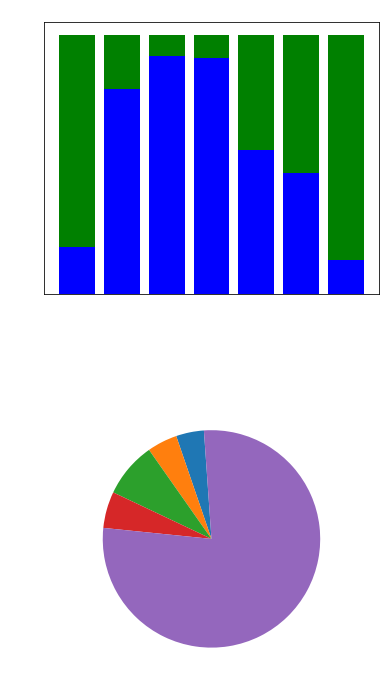

In [190]:
party_bars = [domains_df[domains_df['Domain']=='Party Games'][genre_order[x]].max().tolist() for x in range(len(genre_order))]
party_bars[1]=(20000-party_bars[1])
party_bars = [party_bars[x]/genre_bars[x] for x in range(len(genre_order))]               
print(party_bars)
print(base_bars)
fig=plt.figure(figsize=(6, 12))
ax = fig.add_subplot(2, 1, 1)
plt.bar(range(len(base_bars)), base_bars, color='green')
plt.bar(range(len(party_bars)), party_bars, color='blue')
ax.set_xticks(range(len(genre_order)))
ax.set_xticklabels(genre_order, rotation=30, ha='right')
plt.title('Genre Metrics compared to Genres as a whole')
plt.ylabel('Percentage of Best Genre')


core_list = party_core.index.values.tolist()
core_list.append('Other')
core_values = party_df[party_df.index.isin(core_list)]['Domain %'].tolist()
core_values.append(party_df[~party_df.index.isin(core_list)]['Domain %'].sum())
print(core_values)

ax = fig.add_subplot(2, 1, 2)
plt.pie(core_values, labels=core_list, normalize=True, startangle=94)
plt.title('Makeup of Genre by Core Mechanics')
plt.subplots_adjust(hspace=0.4)
plt.savefig('Party Overview.png')
plt.show()

In [215]:
#Strategy Slide
strategy_ranked = strategy_core[strategy_core.index.isin(core_ranked)==True].index.values.tolist()
strategy_owned = strategy_core[strategy_core.index.isin(core_owned)==True].index.values.tolist()
print(strategy_core)
print()
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(strategy_ranked)==True])
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(strategy_owned)==True])
print()

genre_ranked = core_mechanics_df[(core_mechanics_df['Mechanic'].isin(strategy_ranked)==True)|(core_mechanics_df['Mechanic'].isin(strategy_owned)==True)]['Mechanic'].tolist()
for mechanic in genre_ranked:
    print(mechanic, (core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['BGG Rank'].max()-strategy_core.loc[mechanic]['Ave. Rank']).round(2), (strategy_core.loc[mechanic]['Ave Owners']-core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['Owned Users'].max()).round(2))
print()
for column in genre_order:
    temp_df = domains_df.sort_values(by=column, ascending=False).reset_index(drop=True)
    print(temp_df[temp_df['Domain']=='Strategy Games'][column])

                               Total   Domain %     Mech %     Ratio    Ave. Rank   Rank Diff.   Ave Owners  Owners Diff.  Ave Complexity  Complexity Diff.  Ave Play Time  Play Time Diff.  Ave Domains  Domain Diff.  Ave Mechanics  Mechanics Diff.
Action Points                  229.0  10.385488  21.164510  2.037893  3231.135371   425.990252  4662.951965    224.502532        2.852489          0.142471      97.641921         4.366184     1.358079      0.014768       5.406114         1.236953
Area Majority / Influence      554.0  25.124717  36.884154  1.468043  3089.400722   567.724902  4196.368231   -242.081202        2.846011          0.135993      98.083032         4.807296     1.288809     -0.054502       4.906137         0.736976
Area Movement                  203.0   9.206349  18.108831  1.966994  4102.921182  -445.795559  4681.438424    242.988991        2.911724          0.201706     128.827586        35.551849     1.408867      0.065556       5.507389         1.338228
Auction/Bidd

[0.6649577804583836, 1.0, 1.0, 0.9178082191780823, 0.9391891891891891, 0.9442508710801393, 0.32203272802596145]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[10.38548752834467, 25.124716553287982, 9.206349206349206, 15.147392290249433, 19.909297052154194, 8.390022675736962, 6.984126984126984, 34.10430839002267, 14.19501133786848, 10.657596371882086, 6.802721088435374, 20.36281179138322, 8.299319727891156, 7.029478458049887, 5.26077097505669, 17.324263038548754, 5.170068027210885, 20.453514739229025, 15.873015873015873, 156.2358276643991]


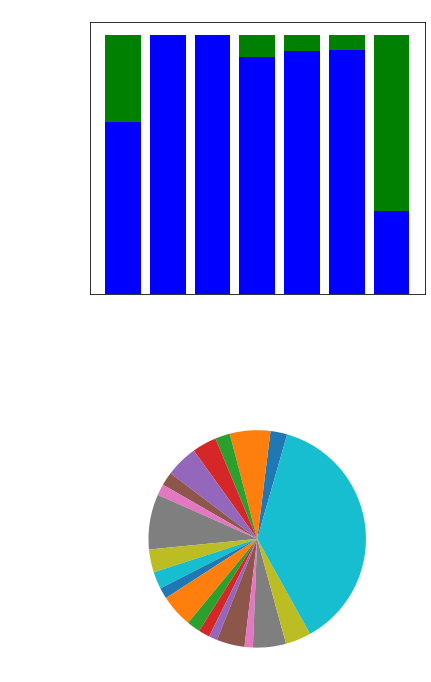

In [192]:
strategy_bars = [domains_df[domains_df['Domain']=='Strategy Games'][genre_order[x]].max().tolist() for x in range(len(genre_order))]
strategy_bars[1]=(20000-strategy_bars[1])
strategy_bars = [strategy_bars[x]/genre_bars[x] for x in range(len(genre_order))]
print(strategy_bars)
print(base_bars)
fig=plt.figure(figsize=(6, 12))
ax = fig.add_subplot(2, 1, 1)
plt.bar(range(len(base_bars)), base_bars, color='green')
plt.bar(range(len(strategy_bars)), strategy_bars, color='blue')
ax.set_xticks(range(len(genre_order)))
ax.set_xticklabels(genre_order, rotation=30, ha='right')
plt.title('Genre Metrics compared to Genres as a whole')
plt.ylabel('Percentage of Best Genre')


core_list = strategy_core.index.values.tolist()
core_list.append('Other')
core_values = strategy_df[strategy_df.index.isin(core_list)]['Domain %'].tolist()
core_values.append(strategy_df[~strategy_df.index.isin(core_list)]['Domain %'].sum())
print(core_values)

ax = fig.add_subplot(2, 1, 2)
plt.pie(core_values, labels=core_list, normalize=True, startangle=74)
plt.title('Makeup of Genre by Core Mechanics')
plt.subplots_adjust(hspace=0.4)
plt.savefig('Strategy Overview.png')
plt.show()

In [211]:
#Thematic Slide
thematic_ranked = thematic_core[thematic_core.index.isin(core_ranked)==True].index.values.tolist()
thematic_owned = thematic_core[thematic_core.index.isin(core_owned)==True].index.values.tolist()
print(thematic_core)
print()
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(thematic_ranked)==True])
print(core_mechanics_df[core_mechanics_df['Mechanic'].isin(thematic_owned)==True])
print()
genre_ranked = core_mechanics_df[(core_mechanics_df['Mechanic'].isin(thematic_ranked)==True)|(core_mechanics_df['Mechanic'].isin(thematic_owned)==True)]['Mechanic'].tolist()
for mechanic in genre_ranked:
    print(mechanic, (core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['BGG Rank'].max()-thematic_core.loc[mechanic]['Ave. Rank']).round(2), (thematic_core.loc[mechanic]['Ave Owners']-core_mechanics_df[core_mechanics_df['Mechanic']==mechanic]['Owned Users'].max()).round(2))
print()
for column in genre_order:
    temp_df = domains_df.sort_values(by=column, ascending=False).reset_index(drop=True)
    print(temp_df[temp_df['Domain']=='Thematic Games'][column])

                                    Total   Domain %     Mech %     Ratio    Ave. Rank   Rank Diff.   Ave Owners  Owners Diff.  Ave Complexity  Complexity Diff.  Ave Play Time  Play Time Diff.  Ave Domains  Domain Diff.  Ave Mechanics  Mechanics Diff.
Action Points                       170.0  14.480409  15.711645  1.085028  3721.323529  1511.392825  5295.300000   1249.766780        2.739176          0.297941      96.147059        -0.685139     1.423529     -0.033881       6.235294         1.790660
Area Movement                       148.0  12.606474  13.202498  1.047279  4488.864865   743.851489  5055.466216   1009.932996        2.702297          0.261062     118.547297        21.715100     1.459459      0.002049       5.817568         1.372934
Cooperative Game                    309.0  26.320273  22.039943  0.837375  2995.828479  2236.887875  6767.291262   2721.758042        2.658673          0.217438     110.990291        14.158094     1.275081     -0.182330       5.699029         1

[0.3540410132689988, 0.9035915968247927, 0.9114736000180244, 1.0, 1.0, 0.8501742160278745, 0.3342884761444452]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[14.480408858603067, 12.606473594548552, 26.320272572402043, 8.432708688245315, 52.89608177172061, 14.65076660988075, 23.083475298126064, 5.877342419080068, 14.565587734241909, 5.366269165247019, 10.988074957410563, 8.006814310051107, 10.391822827938672, 42.50425894378194, 194.29301533219763]


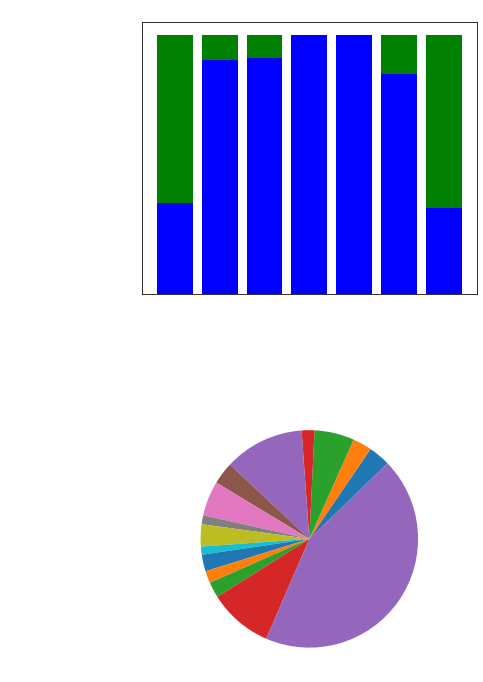

In [193]:
thematic_bars = [domains_df[domains_df['Domain']=='Thematic Games'][genre_order[x]].max().tolist() for x in range(len(genre_order))]
thematic_bars[1]=(20000-thematic_bars[1])
thematic_bars = [thematic_bars[x]/genre_bars[x] for x in range(len(genre_order))]
print(thematic_bars)
print(base_bars)
fig=plt.figure(figsize=(6, 12))
ax = fig.add_subplot(2, 1, 1)
plt.bar(range(len(base_bars)), base_bars, color='green')
plt.bar(range(len(thematic_bars)), thematic_bars, color='blue')
ax.set_xticks(range(len(genre_order)))
ax.set_xticklabels(genre_order, rotation=30, ha='right')
plt.title('Genre Metrics compared to Genres as a whole')
plt.ylabel('Percentage of Best Genre')


core_list = thematic_core.index.values.tolist()
core_list.append('Other')
core_values = thematic_df[thematic_df.index.isin(core_list)]['Domain %'].tolist()
core_values.append(thematic_df[~thematic_df.index.isin(core_list)]['Domain %'].sum())
print(core_values)

ax = fig.add_subplot(2, 1, 2)
plt.pie(core_values, labels=core_list, normalize=True, startangle=44)
plt.title('Makeup of Genre by Core Mechanics')
plt.subplots_adjust(hspace=0.4)
plt.savefig('Thematic Overview.png')
plt.show()